In [1]:
# Load in packages for pandas, astropy, etc. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.io import ascii
from astropy.table import Column, MaskedColumn
from astropy.io.ascii import masked
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.cosmology import LambdaCDM 
from astroquery.simbad import Simbad
from astroquery.sdss import SDSS
from astropy.coordinates import match_coordinates_sky
import os 
import json 

cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) #Creating our choice of cosmology here...

pd.set_option('display.max_columns', 300) # Setting max number of rows per df to be the size of the df
pd.set_option('display.max_rows', None)




In [2]:
# Created this notebook on 6 March 2024; this was broken off of the formatting DR8 notebook


# Notes....





In [2]:
# reading in the formatted version DR0p8
MAC = pd.read_csv('MAC_DR0p9.csv', sep=',')


In [3]:
import ast

def get_selection_method(waveband, technique):
    def filter_function(row):
        # Access the value in the 'Parsed Selection Method' column
        selection_method = row['Parsed Selection Method']
        
        # If the value is a string, convert it back to a dictionary
        if isinstance(selection_method, str):
            try:
                selection_dict = ast.literal_eval(selection_method)
            except ValueError:
                return False
        else:
            selection_dict = selection_method

        # Check if the waveband is a key and the technique is one of its values
        return str(waveband) in selection_dict and str(technique) in selection_dict[str(waveband)]

    return filter_function

def get_analysis_method(waveband, technique):
    def filter_function(row):
        # Access the value in the 'Parsed Selection Method' column
        analysis_method = row['Parsed Analysis Method']
        
        # If the value is a string, convert it back to a dictionary
        if isinstance(analysis_method, str):
            try:
                analysis_dict = ast.literal_eval(analysis_method)
            except ValueError:
                return False
        else:
            analysis_dict = analysis_method

        # Check if the waveband is a key and the technique is one of its values
        return str(waveband) in analysis_dict and str(technique) in analysis_dict[str(waveband)]

    return filter_function

## Apply the filter function with specific waveband and technique
#filter_selection = get_selection_method('Optical', 'Spectroscopy')
#df_selection = MAC[MAC.apply(filter_selection, axis=1)]
#
#filter_analysis = get_analysis_method('X-ray', 'Imaging')
#df_analysis = MAC[MAC.apply(filter_analysis, axis=1)]



In [ ]:
filter_selection = get_selection_method('Radio', 'Imaging')
df_selection = MAC2[MAC2.apply(filter_selection, axis=1)]
len(df_selection)


df_selection = df_selection[(df_selection['Paper(s)']!='Yang+2019') & \
                           (df_selection['Paper(s)']!='Yang+2019 ; Joshi+2019') & \
                           (df_selection['Paper(s)']!='Proctor+2011') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Roberts+2018 ; Lal+2019') & \
                           (df_selection['Paper(s)']!='Orosz+2013') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Roberts+2018 ; Saripalli+2018 ; Saripalli+2018') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Proctor+2011 ; Roberts+2018 ; Saripalli+2018 ; Saripalli+2018 ; Lal+2019') & \
                           (df_selection['Paper(s)']!='Proctor+2011 ; Yang+2019 ; Joshi+2019') & \
                           (df_selection['Paper(s)']!='Yuan+2016 ; Cheung+2007 ; Roberts+2018 ; Saripalli+2018 ; Saripalli+2018') & \
                           (df_selection['Paper(s)']!='Yuan+2016 ; Yang+2019 ; Joshi+2019') & \
                           (df_selection['Paper(s)']!='Proctor+2011 ; Yang+2019') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Roberts+2018 ; Saripalli+2018 ; Saripalli+2018 ; Lal+2019') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Roberts+2018') & \
                           (df_selection['Paper(s)']!='Cheung+2007 ; Proctor+2011 ; Roberts+2018 ; Saripalli+2018 ; Saripalli+2018') & \
                           (df_selection['Paper(s)']!='Proctor+2011 ; Yang+2019') & \
                           (df_selection['Paper(s)']!='Proctor+2011 ; Yang+2019') ]

df_selection[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]




In [ ]:
band = ['Optical']
tech = ['Double-Peaked Spectroscopic Emission Lines', 'Fiber Spectroscopy', 'Spectroscopic Emission Line Ratios',\
        'Spectroscopy','IFU Spectroscopy', 'Long-Slit Spectroscopy']

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = MAC[MAC.apply(filter_selection, axis=1)]
        print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

In [ ]:
band = ['Optical']
tech = ['Double-Peaked Spectroscopic Emission Lines', 'Fiber Spectroscopy', 'Spectroscopic Emission Line Ratios',\
        'Spectroscopy','IFU Spectroscopy', 'Long-Slit Spectroscopy']
band2 = ['X-ray']
tech2 = ['Imaging']

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = MAC[MAC.apply(filter_selection, axis=1)]
        print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        #for k in band2:
        #    for m in tech2:
        #        filter_selection = get_selection_method(str(k), str(m))
        #        df_selection = df_selection[df_selection.apply(filter_selection, axis=1)] 
        #        print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))
            

In [4]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique

MAC1 = MAC[(MAC['Primary System Type']=='Dual AGN') | (MAC['Primary System Type']=='Dual AGN Candidate') | \
           (MAC['Primary System Type']=='Dual SMBH Candidate') | \
           (MAC['Primary System Type']=='Dual AGN Candidate ; Dual SMBH Candidate')]

MAC2 = MAC[(MAC['Primary System Type']=='Binary AGN') | (MAC['Secondary System Type']=='Binary AGN Candidate') | \
           (MAC['Secondary System Type']=='Binary SMBH Candidate') | (MAC['Primary System Type']=='Binary AGN Candidate') |\
           (MAC['Primary System Type']=='Binary AGN Candidate ; Binary SMBH Candidate') | \
           (MAC['Secondary System Type']=='Binary AGN Candidate ; Binary SMBH Candidate') | \
          (MAC['Primary System Type']=='Binary SMBH Candidate')]

MAC3 = MAC[(MAC['Primary System Type']=='Recoil Candidate') | (MAC['Secondary System Type']=='Recoil Candidate') | \
           (MAC['Tertiary System Type']=='Recoil Candidate')]


#band = ['Optical']
#tech = ['Double-Peaked Spectroscopic Emission Lines', 'Fiber Spectroscopy', 'Spectroscopic Emission Line Ratios',\
#        'Spectroscopy','IFU Spectroscopy', 'Long-Slit Spectroscopy']

#filter_selection = get_selection_method('Optical', 'Spectroscopy')
#df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

#df_selection['Parsed Selection Method'].unique()

print(len(MAC1),len(MAC2),len(MAC3))

4336 1369 581


In [5]:
#MAC['Secondary System Type'].unique()

In [ ]:
tech = ['Infrared Luminosity', 'Optical Periodicity', 'Radio-Infrared Colors', 'Mid-IR Colors',\
'Optical Slitless Spectroscopy', 'Optical Double-Peaked Spectroscopic Emission Lines', \
'X-ray Spectroscopy', 'Radio Double Sources', 'Optical IFU Imaging', 'X-ray Imaging', \
'Optical Varstrometry', 'UV Spectroscopy', 'X-ray Quasi-Periodicity',\
'Near-IR Quasi-Periodicity', 'UV Imaging', 'Optical Spectroscopy',\
'Optical Optical LOS Radial Velocity Shifts', 'X-ray Positional Offset', \
'Modeling', 'Near-IR Spectroscopy', 'Optical LOS Radial Velocity Shifts',\
'Optical Spectroscopic Emission Line Ratios', 'Radio X-Shaped Source',\
'Optical Double-Peaked Broad Spectroscopic Emission Lines', 'Near-IR Imaging', \
'Near-IR Periodicity', 'Radio Periodicity', 'Near-IR Positional Offset',\
'Optical Fiber Spectroscopy', 'Submillimeter Imaging', 'Gamma-Ray Quasi-Periodicity', \
'UV Double-Peaked Narrow Spectroscopic Emission Lines', 'Optical Narrow-Band Imaging',\
'Optical Positional Offset', 'Near-IR Colors', 'Optical Photometry',\
'Mid-IR Spectroscopy', 'Optical Imaging', 'Radio Imaging', 'Serendipitous',\
'Hard X-ray BAT Selection', 'Radio Double Jet', 'Optical IFU Spectroscopy',\
'Optical Velocity Offset Broad Spectroscopic Emission Lines', 'Optical Astrometry',\
'Optical Colors', 'Gamma-Ray Periodicity', 'Radio-Optical Offsets', \
'Radio Quasi-Periodicity', 'Optical Quasi-Periodicity', 'Mid-IR Imaging',\
'Near-IR Slit Spectroscopy', 'Hard X-ray Periodicity',\
'Optical Velocity Offset Narrow Spectroscopic Emission Lines',\
'Velocity Offset Emission Lines', 'Radio Jet Precession', \
'Optical-Mid-IR Colors', 'Optical Long-Slit Spectroscopy', 'X-ray Periodicity',\
'Optical Slit Spectroscopy']
tech=set(tech)
tech

In [102]:
wavebands = []
techniques = []
counts = []
#'Gamma-Ray', 'Gamma-Ray', 'Hard X-ray', 'Near-IR','Near-IR','Optical', 'X-ray', 'X-ray', 'Radio','Radio','Optical',
# 'Radio','Optical','Optical','Optical', 'Radio',
wavebands = ['Hard X-ray','Infrared','Mid-IR','Mid-IR','Mid-IR','Near-IR','Near-IR','Near-IR',
 'Near-IR','Near-IR','Optical','Optical','Optical','Optical','Optical','Optical',
 'Optical','Optical','Optical','Optical','Optical','Optical','Optical','Optical','Optical',
 'Optical','Optical','Optical','Optical',
 'Mid-IR',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Infrared',
 'Radio',
 'Optical',
 'Submillimeter',
 'UV',
 'UV',
 'UV',
 'X-ray',
 'X-ray',
 'X-ray']

#'Periodicity','Quasi-Periodicity', 'Periodicity', 'Periodicity','Quasi-Periodicity', 'Periodicity', 'Quasi-Periodicity',
# 'Periodicity', 'Periodicity','Quasi-Periodicity','Quasi-Periodicity', 'Jet Precession',
#'Double-Peaked Broad Spectroscopic Emission Lines','LOS Radial Velocity Shifts', 'Photometry', 'X-Shaped Source',
techniques = [
 'BAT Selection','Luminosity','Colors','Imaging','Spectroscopy','Colors','Imaging',
 'Positional Offset','Slit Spectroscopy','Spectroscopy','Astrometry','Colors',
 'Double-Peaked Spectroscopic Emission Lines',
 'Fiber Spectroscopy','IFU Imaging','IFU Spectroscopy','Imaging',
 'Long-Slit Spectroscopy',
 'Narrow-Band Imaging',
 'Optical LOS Radial Velocity Shifts',
 'Positional Offset',
 'Slit Spectroscopy',
 'Slitless Spectroscopy',
 'Spectroscopic Emission Line Ratios',
 'Spectroscopy',
 'Varstrometry',
 'Velocity Offset Broad Spectroscopic Emission Lines',
 'Velocity Offset Narrow Spectroscopic Emission Lines',
 'Optical-Mid-IR Colors',
 'Optical-Mid-IR Colors',
 'Double Jet',
 'Double Sources',
 'Imaging',
 'Radio-Infrared Colors',
 'Radio-Infrared Colors',
 'Radio-Optical Offsets',
 'Radio-Optical Offsets',
 'Imaging',
 'Double-Peaked Narrow Spectroscopic Emission Lines',
 'Imaging',
 'Spectroscopy',
 'Imaging',
 'Positional Offset',
 'Spectroscopy']



norm = len(MAC1)
labels = []
for i, j in zip(wavebands,techniques):
    filter_selection = get_selection_method(str(i), str(j))
    df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]
    if str(i)+' '+str(j) == 'Optical Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Radio Imaging':
        count = len(df_selection)-12
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Near-IR Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Fiber Spectroscopy':
        count = len(df_selection)-17 #?
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Spectroscopy':
        count = len(df_selection)-15 #?
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Velocity Offset Broad Spectroscopic Emission Lines':
        count = len(df_selection)-8
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))        
    else:
        count = len(df_selection)
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))

order = range(len(wavebands))

for i in reversed(order): # reversing our iteration order so we don't screw up our indexes
    if float((counts[i]*norm))<1.0:
        wavebands.pop(i)
        techniques.pop(i)
        counts.pop(i)
        labels.pop(i)

#counts
#print(len(wavebands),len(techniques),len(counts))
#for i,j in zip(wavebands,techniques):
#    print(i,j)

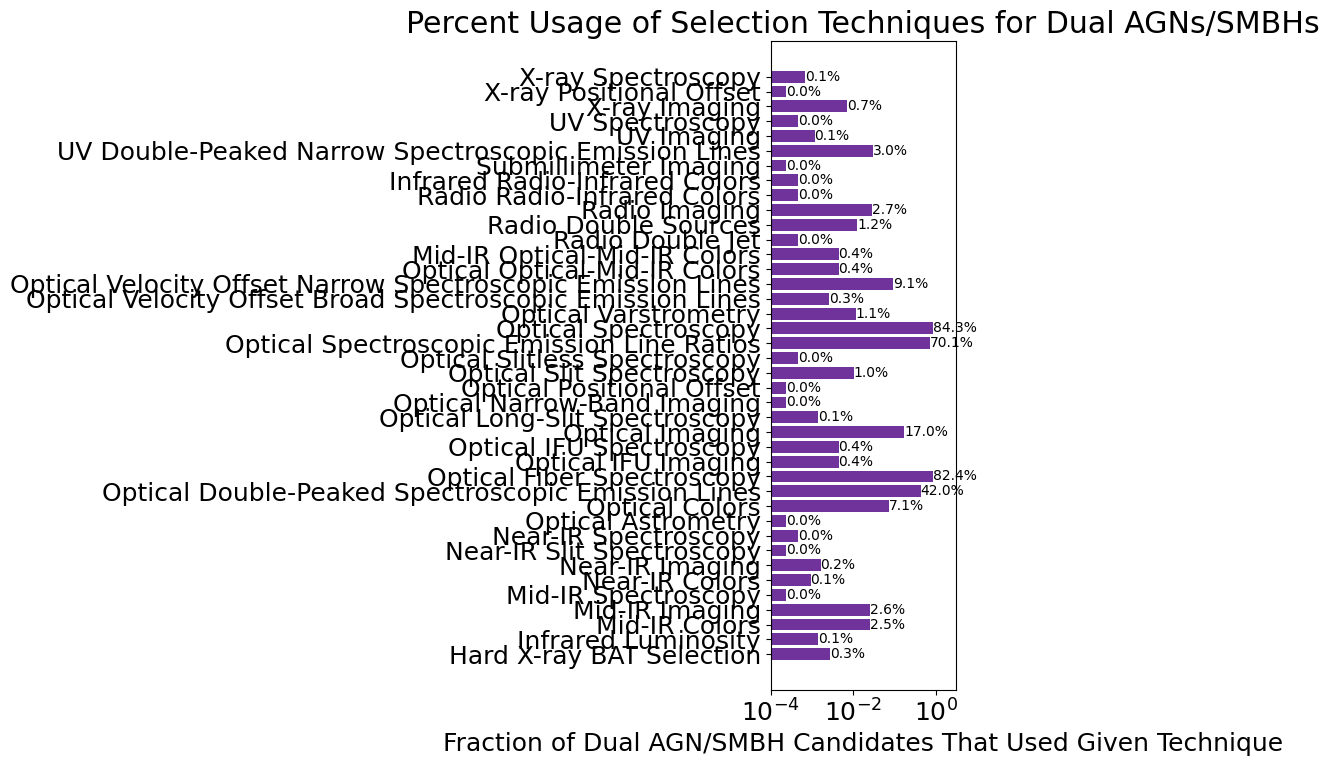

In [104]:
#total = sum(combination_counts.values())
#normalized_counts = {k: v / total for k, v in combination_counts.items()}

# Prepare data for plotting
#labels = list(normalized_counts.keys())
#counts = list(normalized_counts.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(labels, counts, color='indigo', alpha = 0.8, log=True)

for bar in bars:
    width = bar.get_width()  # Use get_width for horizontal bars
    if width > 0.0001:  # Adjust this threshold if necessary
        percentage = f'{100 * width:.1f}%'  # Calculate the percentage based on the bar's width
        ax.text(width, bar.get_y() + bar.get_height() / 2, percentage,  # Position the text at the end of the bar
                ha='left', va='center', fontsize=10)  # Adjust text alignment

ax.set_xlim([0.0001, 3]) 


plt.xlabel('Fraction of Dual AGN/SMBH Candidates That Used Given Technique')
plt.title('Percent Usage of Selection Techniques for Dual AGNs/SMBHs')
plt.tight_layout()
plt.savefig('DualAGN_selectmethods_aggregate.pdf', dpi=150)
plt.show()


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('X-ray', 'Positional Offset')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

print(len(df_selection))
df_selection

#2 optical periodicity (remove only 1 optical imaging)
#1 optical quasi-periodicity (keep optical imaging)
#1 near-ir quasi periodicity (remove 1 near-ir imaging)
# NO near-ir periodicity
# NO X-ray periodicity OR quasi-periodicity
# 1 gamma ray quasi periodicity but no periodicity
# several of these arre the same object PKS 0537

# 1 radio periodicity (subtract 1 from radio imaging)
# no radio quasi-periodicity

# we can remove gamma ray and radio completely


# 'Velocity Offset Broad Spectroscopic Emission Lines', --> 8 need to be removed but do not remove optical spectra
# 'LOS Radial Velocity Shifts', --> remove completely but do not remove optical spectra
# 'Photometry', --> remove completely
#  'Double-Peaked Broad Spectroscopic Emission Lines' --> remove completely but do not remove any optical spectra

# to check:
#  'Double Jet', --> this is fine
# 'Double Sources', this is fine
# 'Imaging', --> remove 12 based on x-shaped alone
# 'Jet Precession', --> remove completely
# 'X-Shaped Source', --> remove all but one???


In [ ]:
# secondary check that will go in the appendix

MAC4 = MAC1[MAC1['Paper(s)']!='Liu+2011']

for index, row in MAC4.iterrows():
    if 'Optical Double-Peaked Spectroscopic Emission Lines' in row['Processed Selection Method']:
        MAC4.drop(index, inplace=True, )

wavebands = []
techniques = []
counts = []
#'Gamma-Ray', 'Gamma-Ray', 'Hard X-ray', 'Near-IR','Near-IR','Optical', 'X-ray', 'X-ray', 'Radio','Radio','Optical',
# 'Radio','Optical','Optical','Optical', 'Radio',
wavebands = ['Hard X-ray','Infrared','Mid-IR','Mid-IR','Mid-IR','Near-IR','Near-IR','Near-IR',
 'Near-IR','Near-IR','Optical','Optical','Optical','Optical','Optical','Optical',
 'Optical','Optical','Optical','Optical','Optical','Optical','Optical','Optical','Optical',
 'Optical','Optical','Optical','Optical',
 'Mid-IR',
 'Radio',
 'Radio',
 'Radio',
 'Radio',
 'Infrared',
 'Radio',
 'Optical',
 'Submillimeter',
 'UV',
 'UV',
 'UV',
 'X-ray',
 'X-ray',
 'X-ray']

#'Periodicity','Quasi-Periodicity', 'Periodicity', 'Periodicity','Quasi-Periodicity', 'Periodicity', 'Quasi-Periodicity',
# 'Periodicity', 'Periodicity','Quasi-Periodicity','Quasi-Periodicity', 'Jet Precession',
#'Double-Peaked Broad Spectroscopic Emission Lines','LOS Radial Velocity Shifts', 'Photometry', 'X-Shaped Source',
techniques = [
 'BAT Selection','Luminosity','Colors','Imaging','Spectroscopy','Colors','Imaging',
 'Positional Offset','Slit Spectroscopy','Spectroscopy','Astrometry','Colors',
 'Double-Peaked Spectroscopic Emission Lines',
 'Fiber Spectroscopy','IFU Imaging','IFU Spectroscopy','Imaging',
 'Long-Slit Spectroscopy',
 'Narrow-Band Imaging',
 'Optical LOS Radial Velocity Shifts',
 'Positional Offset',
 'Slit Spectroscopy',
 'Slitless Spectroscopy',
 'Spectroscopic Emission Line Ratios',
 'Spectroscopy',
 'Varstrometry',
 'Velocity Offset Broad Spectroscopic Emission Lines',
 'Velocity Offset Narrow Spectroscopic Emission Lines',
 'Optical-Mid-IR Colors',
 'Optical-Mid-IR Colors',
 'Double Jet',
 'Double Sources',
 'Imaging',
 'Radio-Infrared Colors',
 'Radio-Infrared Colors',
 'Radio-Optical Offsets',
 'Radio-Optical Offsets',
 'Imaging',
 'Double-Peaked Narrow Spectroscopic Emission Lines',
 'Imaging',
 'Spectroscopy',
 'Imaging',
 'Positional Offset',
 'Spectroscopy']



norm = len(MAC1)
labels = []
for i, j in zip(wavebands,techniques):
    filter_selection = get_selection_method(str(i), str(j))
    df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]
    if str(i)+' '+str(j) == 'Optical Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Radio Imaging':
        count = len(df_selection)-12
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Near-IR Imaging':
        count = len(df_selection)-1
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Fiber Spectroscopy':
        count = len(df_selection)-17 #?
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Optical Spectroscopy':
        count = len(df_selection)-15 #?
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))
    elif str(i)+' '+str(j) == 'Velocity Offset Broad Spectroscopic Emission Lines':
        count = len(df_selection)-8
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))        
    else:
        count = len(df_selection)
        counts.append(count/norm)
        labels.append(str(i)+' '+str(j))

order = range(len(wavebands))

for i in reversed(order): # reversing our iteration order so we don't screw up our indexes
    if float((counts[i]*norm))<1.0:
        wavebands.pop(i)
        techniques.pop(i)
        counts.pop(i)
        labels.pop(i)

#total = sum(combination_counts.values())
#normalized_counts = {k: v / total for k, v in combination_counts.items()}

# Prepare data for plotting
#labels = list(normalized_counts.keys())
#counts = list(normalized_counts.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(labels, counts, color='indigo', alpha = 0.8, log=True)

for bar in bars:
    width = bar.get_width()  # Use get_width for horizontal bars
    if width > 0.0001:  # Adjust this threshold if necessary
        percentage = f'{100 * width:.1f}%'  # Calculate the percentage based on the bar's width
        ax.text(width, bar.get_y() + bar.get_height() / 2, percentage,  # Position the text at the end of the bar
                ha='left', va='center', fontsize=10)  # Adjust text alignment

ax.set_xlim([0.0001, 3]) 


plt.xlabel('Fraction of Dual AGN/SMBH Candidates That Used Given Technique')
plt.title('Percent Usage of Selection Techniques for Dual AGNs/SMBHs')
plt.tight_layout()
plt.savefig('DualAGN_selectmethods_aggregate_appendix.pdf', dpi=150)
plt.show()



In [110]:
g1 = MAC1.copy()
#for index, row in g1.iterrows():
#    if 'UV Spectroscopy' not in row['Processed Selection Method']:
#        g1.drop(index, inplace=True)

g1 = g1[g1['Processed Selection Method'].str.contains('Mid-IR Colors', na=False)]

g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
539,J114753.63+094552.0 / J1147+0945 S,Liu+2011b ; Satyapal+2017 ; Pfeifle+2019a,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1363,J091800.77+153621.46,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1364,J095503.57+614242.66,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1365,J105354.90-100941.44,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1366,J113820.28+203336.93,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1367,J115222.15+271543.29,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1368,J121642.25+292537.97,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
1369,J214858.11-074033.28,Findlay+2018,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Optical': ['Slit Spectroscopy', 'Spectroscop..."
2727,Mrk 463E,Bianchi+2008 ; Wang+2010 ; Imanishi+2014 ; Dut...,Dual AGN,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Optical': ['Spectroscopy'], 'X-ray': ['Imagi..."
2748,X1 (Eastern),Ellison+2017 ; Fu+2018,Dual AGN,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [..."


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Optical', 'Spectroscopy')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

3671
3671 Optical Spectroscopy
3590 Optical Fiber Spectroscopy
6 Optical Long-Slit Spectroscopy
44 Optical Slit Spectroscopy
2 Optical Slitless Spectroscopy
19 Optical IFU Spectroscopy
1822 Optical Double-Peaked Spectroscopic Emission Lines
3040 Optical Spectroscopic Emission Line Ratios
395 Optical Velocity Offset Narrow Spectroscopic Emission Lines
11 Optical Velocity Offset Broad Spectroscopic Emission Lines
244 Optical Imaging
19 Optical IFU Imaging
140 Optical Colors
1 Optical Positional Offset
1 Optical Astrometry
3 Optical Varstrometry


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2589596649.py:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


5 X-ray Imaging
1 X-ray Positional Offset
1 X-ray Spectroscopy
1 Hard X-ray BAT Selection
3 Near-IR Colors
3 Near-IR Imaging
1 Mid-IR Spectroscopy
6 Mid-IR Imaging
5 Mid-IR Colors
20 Radio Imaging
1 UV Spectroscopy
2 UV Imaging


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2589596649.py:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2589596649.py:191: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2589596649.py:224: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


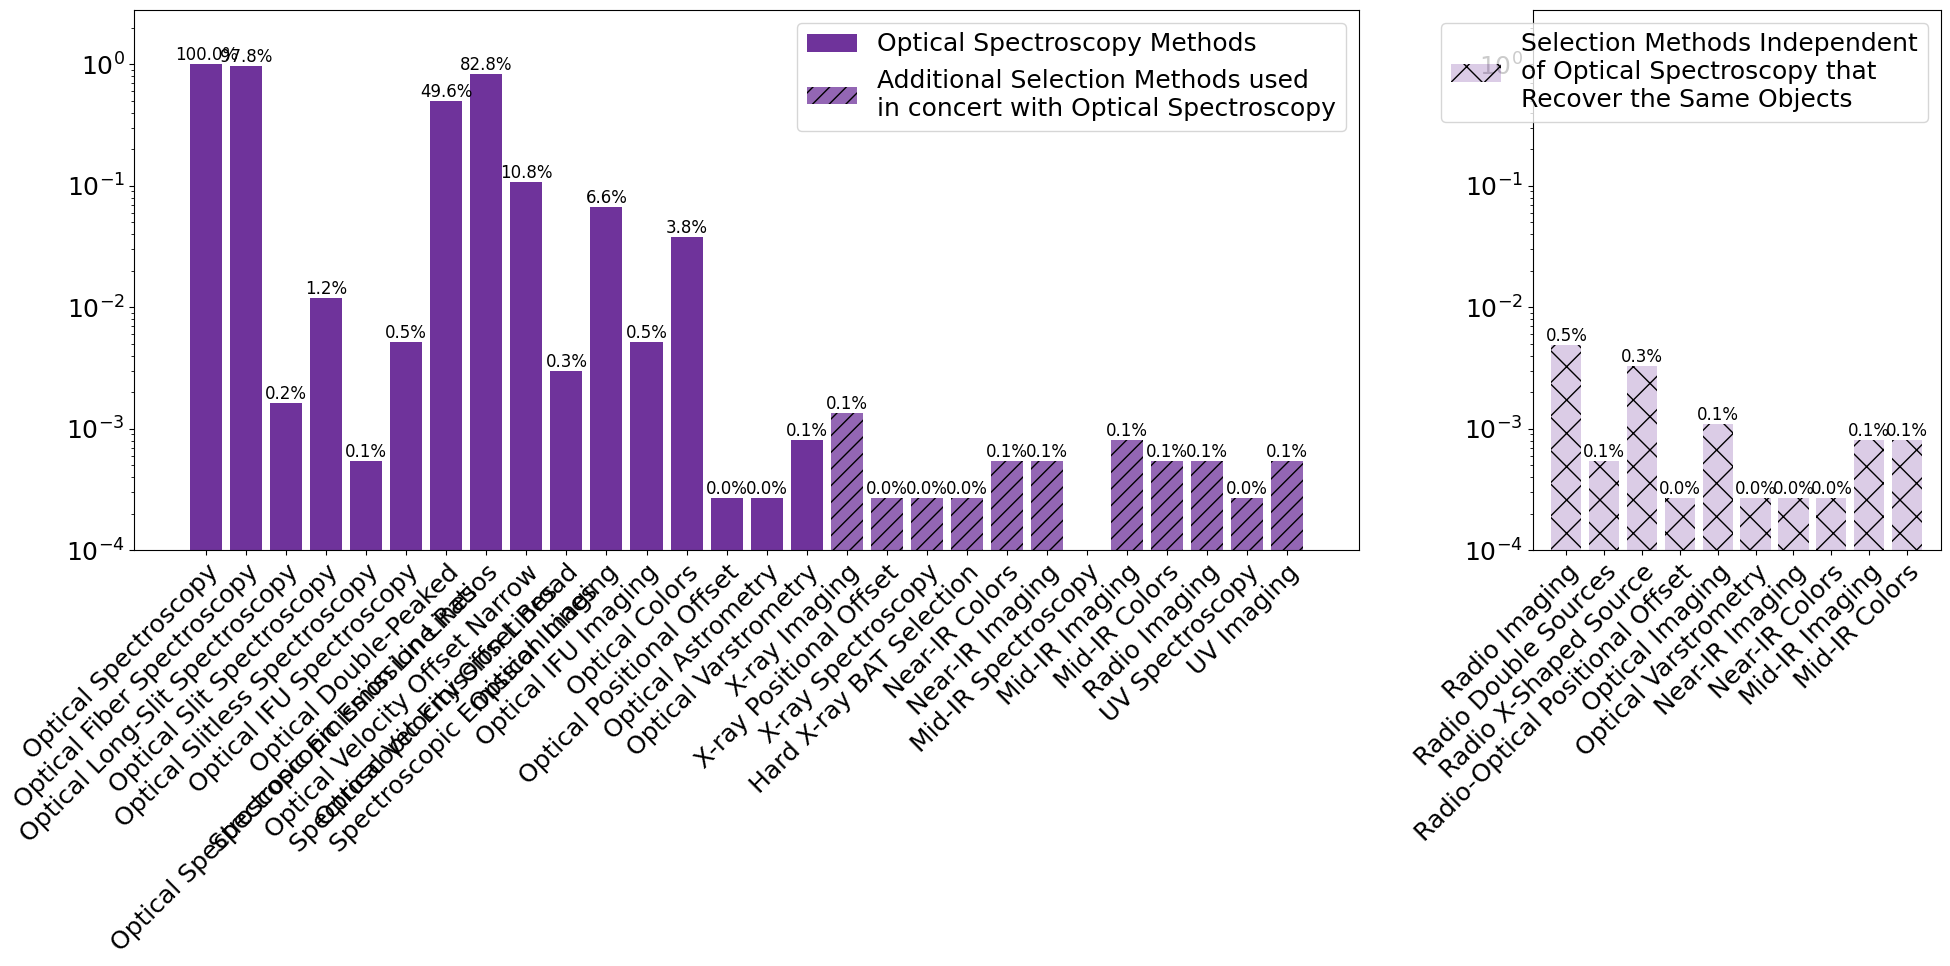

In [87]:
# here we're testing out the plotting for objects that have optical spectroscopy as a selection technique
#('Hard X-ray', 'BAT Selection') *
#('Infrared', 'Imaging') *
#('Mid-IR', 'Colors') *
#('Mid-IR', 'Imaging') *
#('Mid-IR', 'Spectroscopy') *
#('Near-IR', 'Colors') *
#('Near-IR', 'Imaging') *
#('Radio', 'Double Sources')
#('Radio', 'Imaging')
#('Radio', 'Radio-Optical Positional Offsets')
#('Radio', 'X-Shaped Source')
#('UV', 'Imaging') *
#('UV', 'Spectroscopy') *
#('X-ray', 'BAT Selection') *
#('X-ray', 'Imaging') *
#('X-ray', 'Positional Offset') *
#('X-ray', 'Spectroscopy') *

#('Optical', 'Astrometry') *
#('Optical', 'Colors') *
#('Optical', 'Double-Peaked Broad Spectroscopic Emission Lines') *
#('Optical', 'Double-Peaked Spectroscopic Emission Lines') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'IFU Imaging') *
#('Optical', 'IFU Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'LOS Radial Velocity Shifts') *
#('Optical', 'Long-Slit Spectroscopy') *
#('Optical', 'Periodicity') *
#('Optical', 'Positional Offset') *
#('Optical', 'Radio-Optical Positional Offsets') *
#('Optical', 'Slit Spectroscopy') *
#('Optical', 'Slitless Spectroscopy') *
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Varstrometry') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines')*

band = ['Optical']
tech = ['Spectroscopy','Fiber Spectroscopy','Long-Slit Spectroscopy','Slit Spectroscopy','Slitless Spectroscopy',\
        'IFU Spectroscopy','Double-Peaked Spectroscopic Emission Lines',\
        'Spectroscopic Emission Line Ratios',\
        'Velocity Offset Narrow Spectroscopic Emission Lines','Velocity Offset Broad Spectroscopic Emission Lines',\
        'Imaging','IFU Imaging','Colors',\
        'Positional Offset', 'Astrometry', 'Varstrometry'] #'LOS Radial Velocity Shifts', 'Periodicity' #'Radio-Optical Positional Offsets',
#'Double-Peaked Broad Spectroscopic Emission Lines',
band2 = ['X-ray']
tech2 = ['Imaging','Positional Offset','Spectroscopy']
band3 = ['Hard X-ray']
tech3 = ['BAT Selection']
band4 = ['Near-IR']
tech4 = ['Colors','Imaging']
band5 = ['Mid-IR']
tech5 = ['Spectroscopy','Imaging','Colors']
band6 = ['Radio']
tech6 = ['Imaging'] #'Double Sources','Radio-Optical Positional Offsets','X-Shaped Source'
band7 = ['UV']
tech7 = ['Spectroscopy','Imaging']

bars = tech
num = []

filter_selection = get_selection_method('Optical', 'Spectroscopy')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Optical Velocity Offset Broad Spectroscopic Emission Lines':
            num.append((len(df_selection)-8)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))
        else:
            num.append(len(df_selection)/norm) 
            print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j))

tech1 = []
for i in tech:
    tech1.append('Optical '+str(i))
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), gridspec_kw={'width_ratios': [3, 1]})
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech1, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Spectroscopy Methods')
for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))


for i in tech2:
    techadd.append('X-ray '+str(i))

for k in band3:
    for m in tech3:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech3:
    techadd.append('Hard X-ray '+str(i))


#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#
#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8)
#xlabels =  ax1.get_xticklabels()
#ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Optical Spectroscopy', transform=ax1.transAxes, fontsize=18)

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-1)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech4:
    techadd.append('Near-IR '+str(i))

for k in band5:
    for m in tech5:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-3)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech5:
    techadd.append('Mid-IR '+str(i))
    
for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-18)/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech6:
    techadd.append('Radio '+str(i))
    
for k in band7:
    for m in tech7:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2))/norm)
        print(str(len(df_selection2)) + ' ' + str(k) + ' ' + str(m))

for i in tech7:
    techadd.append('UV '+str(i))
    
bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Optical Spectroscopy')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech1+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
current_labels = [label.get_text() for label in ax1.get_xticklabels()]
# Update the specific label
xlabels = ['Optical Velocity Offset Broad\nSpectroscopic Emission Lines' if label == 'Optical Velocity Offset Broad Spectroscopic Emission Lines' else label for label in current_labels]
xlabels = ['Optical Velocity Offset Narrow\nSpectroscopic Emission Lines' if label == 'Optical Velocity Offset Narrow Spectroscopic Emission Lines' else label for label in xlabels]
xlabels = ['Optical Double-Peaked\nSpectroscopic Emission Lines' if label == 'Optical Double-Peaked Spectroscopic Emission Lines' else label for label in xlabels]
xlabels = ['Optical Spectroscopic\nEmission Line Ratios' if label == 'Optical Double-Peaked Spectroscopic Emission Lines' else label for label in xlabels]

ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

ax1.legend()


# the second bar chart will go below here...

# radio imaging: 18 
# double radio sources: 2 
# X-shaped radio source: 12 
# Radio-Optical Positional Offsets: 1
# by extension, this also means one optical imaging independent

# Near-IR Imaging: 1 (subtract 1 from first bar chart)
# Near-IR Colors: 1 (subtract 1 from first bar chart)

# Mid-IR Imaging: 3 (subtract 3 from the first bar chart, mrk 463 is selected independeltly along with optical imaging 1)
# Mid-IR Colors: 3 (subtract 3 from the first bar chart, mrk 463 is selected independeltly along with optical imaging 1)

# optical imaging + optical varstrometry = 3 (but both of these overlap with something that used spec and imaging so no need to subtract any)
# optical imaging  (spiniello = 2)

tech = ['Radio Imaging','Radio Double Sources','Radio X-Shaped Source','Radio-Optical Positional Offset',\
       'Optical Imaging','Optical Varstrometry','Near-IR Imaging','Near-IR Colors','Mid-IR Imaging','Mid-IR Colors']
num = [18/norm,2/norm,12/norm,1/norm,4/norm,1/norm,1/norm,1/norm,3/norm,3/norm]
  #'Optical Spectroscopy','Optical Fiber Spectroscopy',
         #'Optical Spectroscopic Emission Line Ratios',\
         #'Optical Double-Peaked Spectroscopic Emission Lines','Mid-IR Imaging','X-ray Imaging'

bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', \
               alpha=0.2, hatch='x', \
               label='Selection Methods Independent\nof Optical Spectroscopy that\nRecover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    if height>0.0001:
        percentage = f'{100*height:.1f}%'
        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.0001, 2.8]) 
ax2.set_ylim([0.0001, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_optspec.pdf', dpi=150)
plt.show()


In [88]:
print('Done!')

Done!


In [101]:
g1 = gandalf.copy()
#for index, row in g1.iterrows():
#    if 'UV Spectroscopy' not in row['Processed Selection Method']:
#        g1.drop(index, inplace=True)

g1 = g1[g1['Processed Selection Method'].str.contains('Optical Imaging', na=False)]

g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
21,J005113.94+002047.2,Liu+2011b ; Fu+2015 ; Fu+2015b ; Gross+2019,Dual AGN,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Radio': ['Sources', 'Double Sources', 'Imagi...","{'Radio': ['Double Sources', 'Imaging']}"
86,J032033.21-002024.0,Liu+2011b ; Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'IFU Imagin...","{'Optical': ['Imaging', 'Fiber Spectroscopy', ...",{}
101,J073905.83+442410.4,Liu+2011b ; Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'IFU Imagin...","{'Optical': ['Imaging', 'Fiber Spectroscopy', ...",{}
539,J114753.63+094552.0 / J1147+0945 S,Liu+2011b ; Satyapal+2017 ; Pfeifle+2019a,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
804,J135225.64+142919.3 / J1352+1429W,Liu+2011b ; Teng+2012,Dual AGN Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Optical': ['Fiber Spectroscopy', 'Imaging', ...",{}
1150,J170024.36+382106.3,Liu+2011b ; Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'IFU Imagin...","{'Optical': ['Imaging', 'Fiber Spectroscopy', ...",{}
1194,J220634.97+000327.6,Liu+2011b ; Fu+2015 ; Fu+2015b ; Gross+2019,Dual AGN,-99,-99,"{'Optical': ['Fiber Spectroscopy', 'Imaging', ...","{'Radio': ['Sources', 'Double Sources', 'Imagi...","{'Radio': ['Double Sources', 'Imaging']}"
1244,J151806.14+424445.06,Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['IFU Imaging', 'IFU Spectroscopy'...","{'Optical': ['Imaging', 'IFU Spectroscopy', 'I...",{}
1245,J213820.74+112055.21,Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['IFU Imaging', 'IFU Spectroscopy'...","{'Optical': ['Imaging', 'IFU Spectroscopy', 'I...",{}
1246,J032033.22-002023.86,Fu+2018,Dual AGN Candidate,-99,-99,"{'Optical': ['IFU Imaging', 'IFU Spectroscopy'...","{'Optical': ['Imaging', 'IFU Spectroscopy', 'I...",{}


In [85]:
gandalf = gandalf[(gandalf['Paper(s)']!='Liu+2011b') & \
                 (gandalf['Paper(s)']!='Kim+2020') & \
                 (gandalf['Paper(s)']!='Yuan+2016') & \
                 (gandalf['Paper(s)']!='Ge+2012') & \
                 (gandalf['Paper(s)']!='Lyu+2016 ; Yuan+2016') & \
                 (gandalf['Paper(s)']!='Smith+2010 ; McGurk+2015 ; Song+2020') & \
                 (gandalf['Paper(s)']!='Smith+2010 ; Song+2020') & \
                 (gandalf['Paper(s)']!='Liu+2010a ; Ge+2012') & \
                 (gandalf['Paper(s)']!='Wang+2009 ; Liu+2010a ; Ge+2012') & \
                 (gandalf['Paper(s)']!='Wang+2009 ; Ge+2012') & \
                 (gandalf['Paper(s)']!='Wang+2009 ; Liu+2010a ; Shen+2011') & \
                 (gandalf['Paper(s)']!='Liu+2011b ; Ge+2012') & \
                 (gandalf['Paper(s)']!='Fu+2018') & \
                 (gandalf['Paper(s)']!='Inada+2008') & \
                 (gandalf['Paper(s)']!='More+2016') & \
                 (gandalf['Paper(s)']!='More+2016 ; Hutsemekers+2020') & \
                 (gandalf['Paper(s)']!='Inada+2012 ; Eftekharzadeh+2017') & \
                 (gandalf['Paper(s)']!='Inada+2012') & \
                 (gandalf['Paper(s)']!='Comerford+2014') & \
                 (gandalf['Paper(s)']!='Comerford+2014 ; Allen+2015') & \
                 (gandalf['Paper(s)']!='Comerford+2014 ; Müller-Sánchez+2016') & \
                 (gandalf['Paper(s)']!='Inada+2010') & \
                 (gandalf['Paper(s)']!='Comerford+2009a') & \
                 (gandalf['Paper(s)']!='Lyu+2016') & \
                 (gandalf['Paper(s)']!='Shi+2014') & \
                 (gandalf['Paper(s)']!='Liu+2010a ; Yuan+2016') & \
                 (gandalf['Paper(s)']!='Liu+2010a ; Shen+2011') & \
                 (gandalf['Paper(s)']!='Liu+2010a') & \
                 (gandalf['Paper(s)']!='Wang+2009') & \
                 (gandalf['Paper(s)']!='Barrows+2016')]

papers = ['Wang+2009 ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018',\
       'Liu+2010a ; Shen+2011 ; Comerford+2012 ; Liu+2018 ; Muller-Sanchez+2015',\
       'Liu+2010a ; Yuan+2016 ; Comerford+2018',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Comerford+2012 ; Comerford+2018',\
       'Smith+2010 ; Ge+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Fu+2012 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012 ; Comerford+2012 ; McGurk+2015',\
       'Wang+2009 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Comerford+2018 ; Foord+2020',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012 ; Comerford+2012',\
       'Smith+2010 ; Rosario+2011 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020 ; Liu+2014 ; Eracleous+2012 ; Runnoe+2015 ; Runnoe+2017 ; Nguyen+2020',\
       'Shi+2014 ; Lyu+2016',\
       'Eracleous+1994 ; Gezari+2007 ; Liu+2016 ; Doan+2020 ; Shi+2014',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018',\
       'Smith+2010 ; Rosario+2011 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Comerford+2012 ; Muller-Sanchez+2015',\
       'Wang+2009 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Muller-Sanchez+2015',\
       'Liu+2010a ; Fu+2012 ; Liu+2018 ; McGurk+2015 ; Comerford+2018',
       'Smith+2010 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Ge+2012 ; Comerford+2012',
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Comerford+2012 ; Comerford+2015 ; Foord+2020',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Comerford+2012 ; Muller-Sanchez+2015',\
       'Smith+2010 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Comerford+2012 ; Liu+2018',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Comerford+2012 ; Comerford+2018',\
       'Wang+2009 ; Liu+2010a ; Smith+2010 ; Ge+2012 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Comerford+2012',\
       'Smith+2010 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Rosario+2011 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Kim+2020 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Fu+2012 ; Comerford+2012 ; McGurk+2015',\
       'Smith+2010 ; Ge+2012 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Fu+2012 ; McGurk+2015',\
       'Liu+2010a ; Smith+2010 ; Smith+2012 ; Ge+2012 ; Comerford+2012 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018',\
       'Liu+2010a ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018',\
       'Liu+2010a ; Ge+2012 ; Comerford+2012 ; Muller-Sanchez+2015 ; Comerford+2018',\
       'Liu+2010a ; Fu+2012 ; McGurk+2015 ; Comerford+2018',\
        'Wang+2009 ; Liu+2010a ; Ge+2012 ; Comerford+2012 ; Liu+2018 ; McGurk+2015 ; Muller-Sanchez+2015 ; Comerford+2018',\
       'Smith+2010 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Fu+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Fu+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Comerford+2012 ; Liu+2018 ; Comerford+2018 ; Rubinur+2019',\
       'Smith+2010 ; Comerford+2012 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; Shi+2014 ; McGurk+2015 ; Muller-Sanchez+2015 ; Yuan+2016 ; Comerford+2018',\
       'Smith+2010 ; Smith+2012 ; Rosario+2011 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Yuan+2016 ; Song+2020',\
       'Smith+2010 ; Ge+2012 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Liu+2018  ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Tingay+2011 ; Shen+2011 ; Ge+2012 ; Fu+2012 ; McGurk+2015',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; McGurk+2015 ; Comerford+2018',\
       'Ge+2012 ; Rubinur+2019',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Comerford+2018 ; Foord+2020',\
       'Smith+2010 ; Shi+2014 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Comerford+2018',\
       'Liu+2010a ; Shen+2011 ; Ge+2012',\
       'Wang+2009 ; Ge+2012 ; Comerford+2012 ; Gabanyi+2016 ; McGurk+2015 ; Muller-Sanchez+2015 ; Comerford+2018',\
       'Liu+2010a ; Smith+2010 ; Ge+2012 ; Comerford+2012 ; Muller-Sanchez+2015 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Yuan+2016',\
       'Liu+2010a ; Smith+2010 ; Ge+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Zhou+2004 ; Jaiswal+2019 ; Liu+2010a ; Yuan+2016 ; Comerford+2018',\
       'Wang+2009 ; Ge+2012 ; Comerford+2012 ; Comerford+2018 ; Rubinur+2019',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Liu+2010b ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Liu+2013 ; Shangguan+2016 ; Bondi+2016 ; Barrows+2016 ; Liu+2018 ; McGurk+2015 ; Yuan+2016',\
       'Wang+2009 ; Liu+2010a ; Tingay+2011 ; Ge+2012',\
       'Wang+2009 ; Ge+2012 ; Comerford+2012 ; Muller-Sanchez+2015',\
       'Smith+2010 ; Ge+2012 ; Song+2020',\
       'Liu+2010a ; Smith+2010 ; Yuan+2016 ; Comerford+2018 ; Song+2020',\
       'Ge+2012 ; Yuan+2016',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Comerford+2018 ; Foord+2020',\
       'Liu+2010a ; Fu+2012 ; McGurk+2015 ; Yuan+2016',\
       'Liu+2010a ; Smith+2010 ; Rosario+2010 ; Song+2020',\
       'Liu+2010a ; Comerford+2012 ; Yuan+2016 ; Comerford+2018',\
       'Smith+2010 ; Fu+2012 ; McGurk+2015 ; Kim+2020 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012 ; Liu+2010b ; Liu+2013 ; Shangguan+2016 ; Bondi+2016',\
       'Wang+2009 ; Shi+2014',\
       'Liu+2010a ; Ge+2012 ; Liu+2018 ; Yuan+2016',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Liu+2010b ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Liu+2013 ; Shangguan+2016 ; McGurk+2015',\
       'Smith+2010 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Villforth+2015 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Tingay+2011 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Muller-Sanchez+2015',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; Gabanyi+2016  ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Rubinur+2017 ; Das+2018 ; Rubinur+2018',\
       'Smith+2010 ; Smith+2012 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Smith+2010 ; Smith+2012 ; Yuan+2016 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Liu+2010a ; Smith+2010 ; Yuan+2016 ; Song+2020',\
       'Ge+2012 ; Barrows+2016 ; Barrows+2018',\
       'Liu+2010a ; Smith+2010 ; Smith+2012 ; Ge+2012 ; Song+2020',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Comerford+2018 ; Kim+2020 ; Foord+2020 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Yuan+2016',\
       'Liu+2010a ; Liu+2018 ; Comerford+2018',\
       'Liu+2010a ; Smith+2010 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Comerford+2012 ; Comerford+2018 ; Kim+2020 ; Song+2020',\
       'Smith+2010 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Song+2020',\
       'Liu+2010a ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018',\
         'Smith+2010 ; Smith+2012 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Xu+2009 ; Smith+2010 ; Lyu+2016 ; Yuan+2016 ; Song+2020',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Comerford+2015 ; Foord+2020',\
       'Liu+2010a ; Smith+2010 ; Ge+2012 ; Yuan+2016 ; Comerford+2018 ; Rubinur+2019 ; Song+2020',\
       'Ge+2012 ; Kim+2020',\
       'Liu+2010a ; Smith+2010 ; Smith+2012 ; Shen+2011 ; Ge+2012 ; Liu+2010b ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Liu+2013 ; Shangguan+2016 ; McGurk+2015 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Yuan+2016 ; Comerford+2018',\
       'Smith+2010 ; Smith+2012 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Ge+2012 ; Shi+2014', 'Liu+2010a ; Liu+2018',\
       'Liu+2010a ; Shen+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2015 ; Liu+2018 ; Shi+2014 ; McGurk+2015 ; Foord+2020',\
       'Liu+2010a ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Smith+2012 ; Ge+2012 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Fu+2012 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018',\
       'Ge+2012 ; Comerford+2013',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Smith+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Song+2020',\
       'Liu+2010a ; Smith+2010 ; Ge+2012 ; Yuan+2016 ; Rubinur+2019 ; Song+2020',\
       'Smith+2010 ; Kim+2020 ; Song+2020',\
       'Liu+2010a ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Foord+2020',\
       'Liu+2010a ; Ge+2012 ; Comerford+2012 ; Comerford+2018',\
       'Wang+2009 ; Tingay+2011 ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Fu+2012 ; An+2013 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Liu+2010a ; Tingay+2011 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Wang+2009 ; Liu+2010a ; Smith+2010 ; Tingay+2011 ; Rosario+2010 ; Ge+2012 ; Comerford+2012 ; Yuan+2016 ; Comerford+2018 ; Song+2020',\
       'Smith+2010 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Ge+2012 ; McGurk+2015 ; Song+2020',\
       'Smith+2010 ; Fu+2012 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Tingay+2011 ; Ge+2012 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Smith+2012 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Kim+2020 ; Song+2020',\
       'Smith+2010 ; Song+2020 ; Eracleous+2012 ; Runnoe+2015 ; Runnoe+2017 ; Nguyen+2020',\
       'Wang+2009 ; Liu+2010a ; Tingay+2011 ; Shen+2011 ; Ge+2012 ; Comerford+2012 ; McGurk+2015 ; Muller-Sanchez+2015',\
       'Smith+2010 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Tingay+2011 ; Ge+2012',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Rubinur+2019',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Comerford+2018 ; Foord+2020',\
       'Smith+2010 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Smith+2010 ; Ge+2012 ; Comerford+2012 ; McGurk+2015 ; Muller-Sanchez+2015 ; Comerford+2018 ; Song+2020',\
       'Wang+2009 ; Ge+2012 ; Comerford+2012 ; McGurk+2015',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; McGurk+2015',\
       'Wang+2009 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; McGurk+2015',\
       'Liu+2010a ; Ge+2012 ; Fu+2012 ; Comerford+2018',\
       'Wang+2009 ; Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015',\
       'Comerford+2011 ; Liu+2010a ; Smith+2010 ; Smith+2012 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; Liu+2018 ; McGurk+2015 ; Muller-Sanchez+2015 ; Villforth+2015 ; Yuan+2016 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015',\
       'Smith+2010 ; Smith+2012 ; Ge+2012 ; Comerford+2012 ; Gabanyi+2016 ; McGurk+2015 ; Comerford+2018 ; Song+2020',\
       'Liu+2010a ; Shen+2011 ; Ge+2012 ; Comerford+2012 ; Yuan+2016 ; Comerford+2018',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Comerford+2012 ; Gabanyi+2016 ; McGurk+2015 ; Rubinur+2019',\
       'Wang+2009 ; Liu+2010a ; Shen+2011 ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; Liu+2018 ; McGurk+2015',\
       'Liu+2010a ; Shen+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; Liu+2018 ; McGurk+2015 ; Yuan+2016 ; Comerford+2018',\
       'Liu+2010a ; Ge+2012 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Comerford+2018',\
       'Kim+2020 ; Eracleous+2012 ; Runnoe+2015 ; Runnoe+2017 ; Nguyen+2020',\
       'Kim+2020 ; Liu+2014', 'Kim+2020 ; Kim+2016', 'Gattano+2014',\
       'Liu+2011b ; Wang+2009 ; Liu+2010a ; Tingay+2011 ; Shen+2011 ; Ge+2012 ; Fu+2012 ; Comerford+2012 ; McGurk+2015 ; Muller-Sanchez+2015',\
         'Liu+2011b ; Comerford+2014', 'Liu+2011b ; Husemann+2020',\
       'Liu+2011b ; Fu+2018',\
       'Liu+2011b ; Barrows+2016 ; Hou+2019 ; Husemann+2020 ; Yuan+2016',\
         'Liu+2011b ; Lena+2018', 'Liu+2011b ; Barrows+2016 ; Hou+2019',\
         'Liu+2011b ; De Rosa+2018 ; De Rosa+2018',\
       'Liu+2011b ; Ge+2012 ; Rubinur+2019',\
       'Liu+2011b ; Liu+2010a ; Ge+2012 ; Nevin+2016',\
       'Liu+2011b ; Liu+2010a', 'Liu+2011b ; Wang+2009 ; Tingay+2011',\
       'Liu+2011b ; Barrows+2016 ; Husemann+2020 ; Comerford+2014 ; Barrows+2016','Liu+2011b ; Hou+2019',\
         'Liu+2011b ; Teng+2012', 'Liu+2011b ; Comerford+2014 ; Keel+2019',\
       'Liu+2011b ; Kharb+2019', 'Liu+2011b ; Liu+2014',\
       'Liu+2011b ; Keel+2019', 'Liu+2011b ; Wang+2009',\
       'Liu+2011b ; Barrows+2016',\
       'Liu+2011b ; Ge+2012 ; Rubinur+2018 ; Rubinur+2019',\
         'Teng+2012', 'Peng+2011 ; Frey+2012', 'Huang+2014 ; Zhang+2016',\
         'Ge+2012 ; Keel+2019',\
       'Fu+2011 ; Smith+2010 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; McGurk+2015 ; Villforth+2015 ; Song+2020',\
       'Boroson+2009 ; Chornock+2009 ; Wrobel+2009 ; Lauer+2009 ; Decarli+2009 ; Tang+2009 ; Chornock+2010 ; Gaskell+2010 ; Bondi+2010 ; Graham+2015 ; Guo+2020 ; Tsalmantza+2011 ; Decarli+2013 ; Lusso+2014 ; Eracleous+2012 ; Runnoe+2015 ; Runnoe+2017 ; Nguyen+2020',\
       'Komossa+2008 ; Shields+2009 ; Bogdanović+2009 ; Dotti+2009 ; Heckman+2009 ; Decarli+2009 ; Decarli+2010 ; Tsalmantza+2011 ; Decarli+2013 ; Lusso+2014 ; Liu+2014 ; Eracleous+2012 ; Runnoe+2015 ; Runnoe+2017 ; Nguyen+2020',\
         'Liu+2010a ; Smith+2010 ; Shen+2011 ; Ge+2012 ; Comerford+2012 ; Comerford+2018 ; Song+2020',\
       'McGurk+2011 ; Smith+2010 ; Rosario+2011 ; Fu+2011 ; Fu+2012 ; Fu+2012 ; Comerford+2012 ; Comerford+2015 ; McGurk+2015 ; Villforth+2015 ; Comerford+2018 ; Foord+2020 ; Song+2020 ; Liu+2014',\
         'Liu+2014 ; Sun+2016','Lemon+2019','Comerford+2013','Sandrinelli+2014','Keel+1985 ; Keel+2019',\
         'Barrows+2016 ; Barrows+2017 ; Barrows+2018','Sekiguchi+1992','Kharb+2015 ; Das+2018','Menezes+2014',\
         'Barrows+2012','Liu+2010a ; Comerford+2012 ; McGurk+2015','Altamura+2020','Comerford+2014 ; Kharb+2020',\
         'Liu+2011b ; Wang+2009 ; Ge+2012',\
         'Liu+2011b ; Liu+2010a ; Ge+2012 ; Comerford+2012 ; Yuan+2016 ; Comerford+2018','Liu+2011b ; Koss+2012',\
         'Fischer+2011','Tadhunter+2012','Balmaverde+2018','Woo+2014','Benitez+2013a','Benitez+2013a ; Gabanyi+2014',\
         'Gerke+2007 ; Comerford+2009a','Hewitt+1998','Rusu+2013','Arrigoni Battaia+2019','Muñoz+1998',\
         'Crampton+1988 ; Crotts+1994 ; Dinshaw+1994','Eftekharzadeh+2017 ; Sandrinelli+2014','Inada+2010 ; Gattano+2014',\
         'Inada+2012 ; Hwang+2020 ; Hwang+2020','Inada+2008 ; Spiniello+2018',\
         'Inada+2008 ; Hwang+2020 ; Hwang+2020']

for i in papers:
    for index, row in gandalf.iterrows():
        if row['Paper(s)']==str(i):
            gandalf.drop(index, inplace=True)
            
#print(len(gandalf))
#
#gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
#        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]


# for the bar chart counting in the middle

# velocity offset broad lines: subtract 8 (check) from the total in the main chart

# for the bar chart at the end
# optical imaging + optical varstrometry = 3
# optical imaging  (spiniello = 2)
#

# radio imaging: 18 
# double radio sources: 2 
# X-shaped radio source: 12 
# Radio-Optical Positional Offsets: 1

# Near-IR Imaging: 1 (subtract 1 from first bar chart)
# Near-IR Colors: 1 (subtract 1 from first bar chart)

# Mid-IR Imaging: 3 (subtract 3 from the first bar chart, mrk 463 is selected independeltly along with optical imaging 1)
# Mid-IR Colors: 3 (subtract 3 from the first bar chart, mrk 463 is selected independeltly along with optical imaging 1)

# removed near-IR colors and imaging from piconcelli target (the nuclei are not both selected by imanishi's technique)
# added to NGC 6240

In [ ]:
gandalf['Paper(s)'].unique()

In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Optical', 'Imaging')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

738
Optical Imaging 738
Optical IFU Imaging 19
Optical Colors 306
Optical Radio-Optical Positional Offsets 48
Optical Positional Offset 1
Optical Astrometry 1
Optical Varstrometry 49
Optical Optical-Mid-IR Colors 19
Optical Spectroscopy 243
Optical Fiber Spectroscopy 216
Optical Long-Slit Spectroscopy 2
Optical Slit Spectroscopy 4
Optical Slitless Spectroscopy 1
Optical IFU Spectroscopy 19
Optical Spectroscopic Emission Line Ratios 11
Optical Velocity Offset Broad Spectroscopic Emission Lines 1


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2610855874.py:105: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


X-ray Imaging 15
UV Imaging 5
UV Spectroscopy 2
Near-IR Imaging 2
Near-IR Colors 1
Mid-IR Imaging 108
Mid-IR Colors 107
Mid-IR Optical-Mid-IR Colors 19
Radio Imaging 103
Radio Double Sources 52
Radio Radio-Optical Positional Offsets 48
Infrared Imaging 2
Infrared Luminosity 5


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2610855874.py:187: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2610855874.py:202: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2610855874.py:227: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


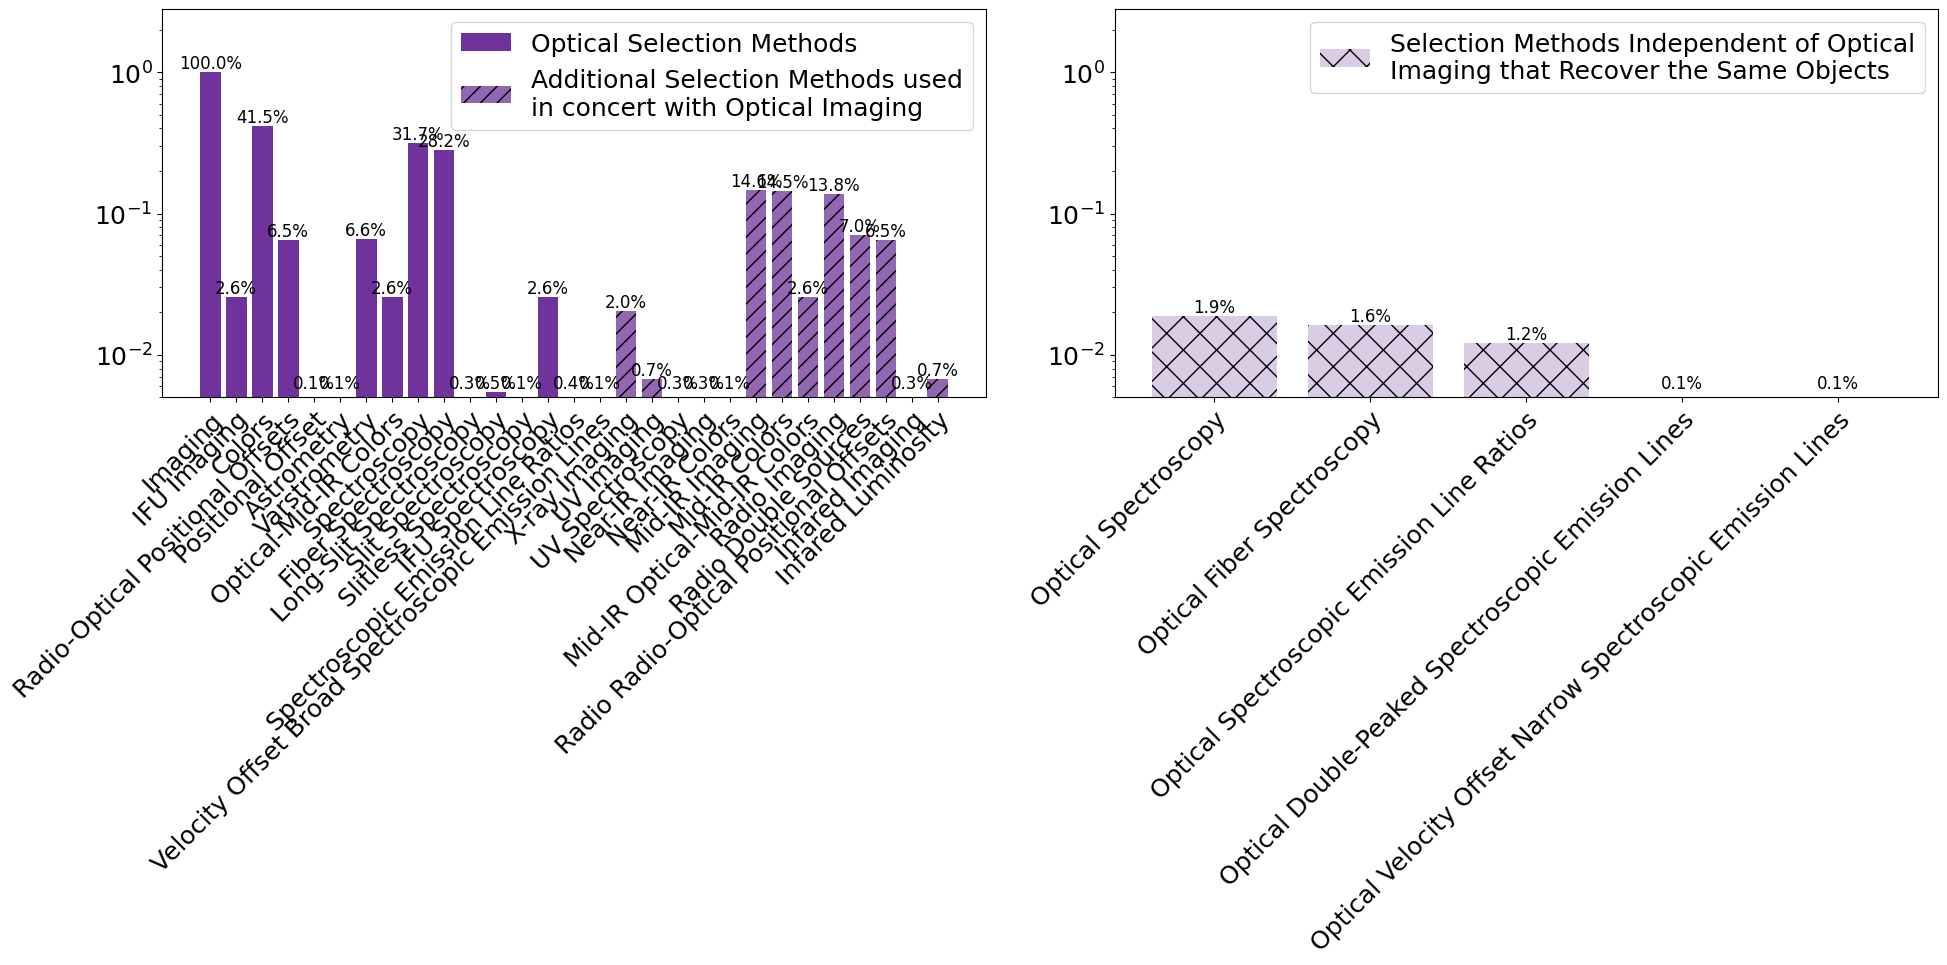

In [68]:
# here we're going to look at optical imaging as a selection technique...
#('Gamma-Ray', 'Quasi-Periodicity')
#('Infrared', 'Imaging') *
#('Infrared', 'Luminosity') *
#('Mid-IR', 'Colors') *
#('Mid-IR', 'Imaging') *
#('Mid-IR', 'Optical-Mid-IR Colors') *
#('Near-IR', 'Colors') *
#('Near-IR', 'Imaging') *
#('Near-IR', 'Quasi-Periodicity') *
#('Radio', 'Double Sources')
#('Radio', 'Imaging')
#('Radio', 'Radio-Optical Positional Offsets')
#('Radio', 'X-Shaped Source')
#('UV', 'Imaging') *
#('UV', 'Spectroscopy') *
#('X-ray', 'Imaging') *

#('Optical', 'Astrometry') *
#('Optical', 'Colors') *
#('Optical', 'Double-Peaked Spectroscopic Emission Lines') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'IFU Imaging') *
#('Optical', 'IFU Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'LOS Radial Velocity Shifts') *
#('Optical', 'Long-Slit Spectroscopy') *
#('Optical', 'Optical-Mid-IR Colors') *
#('Optical', 'Periodicity') **
#('Optical', 'Positional Offset') *
#('Optical', 'Quasi-Periodicity') **
#('Optical', 'Radio-Optical Positional Offsets') *
#('Optical', 'Slit Spectroscopy') *
#('Optical', 'Slitless Spectroscopy') *
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Varstrometry') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines') *

band = ['Optical']
tech = ['Imaging','IFU Imaging','Colors','Radio-Optical Positional Offsets','Positional Offset','Astrometry','Varstrometry',\
        'Optical-Mid-IR Colors','Spectroscopy','Fiber Spectroscopy','Long-Slit Spectroscopy','Slit Spectroscopy',\
        'Slitless Spectroscopy','IFU Spectroscopy', 'Spectroscopic Emission Line Ratios',\
        'Velocity Offset Broad Spectroscopic Emission Lines'] #'Velocity Offset Narrow Spectroscopic Emission Lines'
#'LOS Radial Velocity Shifts','Periodicity',\ 'Double-Peaked Spectroscopic Emission Lines',
#'Quasi-Periodicity'
band2 = ['X-ray']
tech2 = ['Imaging']
band3 = ['UV']
tech3 = ['Imaging', 'Spectroscopy']
band4 = ['Near-IR']
tech4 = ['Imaging','Colors'] #'Quasi-Periodicity'
band5 = ['Mid-IR']
tech5 = ['Imaging','Colors','Optical-Mid-IR Colors']
band6 = ['Radio']
tech6 = ['Imaging','Double Sources','Radio-Optical Positional Offsets'] #'X-Shaped Source'
band7 = ['Infrared']
tech7 = ['Imaging','Luminosity']

bars = tech
num = []

filter_selection = get_selection_method('Optical', 'Imaging')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
gandalf = gandalf[gandalf['Name1']!='J1536+0441 VLA-A']
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        if j=='Spectroscopy':
            num.append((len(df_selection)-9)/norm)
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))
        elif j=='Fiber Spectroscopy':
            num.append((len(df_selection)-8)/norm)
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))
        elif j=='Spectroscopic Emission Line Ratios':
            num.append((len(df_selection)-8)/norm)
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))
        else:
            num.append(len(df_selection)/norm)
            print(str(i)+' '+str(j)+' '+str(len(df_selection)))    


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Optical Selection Methods')
for bar in bars:
    height = bar.get_height()
    if height>0.005:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
    elif height>0.001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, 0.0055, percentage,
            ha='center', va='bottom', fontsize=12) 
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

#9 optical spec
#8 fiber spec
#8 spec ratios
#1 radio imaging
#1 X-shaped radio source

techadd=[]
num=[]        

for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

#tech = []
for i in tech2:
    techadd.append('X-ray '+str(i))

for k in band3:
    for m in tech3:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech3:
    techadd.append('UV '+str(i))

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        
for i in tech4:
    techadd.append('Near-IR '+str(i))

for k in band5:
    for m in tech5:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech5:
    techadd.append('Mid-IR '+str(i))
    
for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Imaging':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        elif m=='X-Shaped Source':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech6:
    techadd.append('Radio '+str(i))
    
for k in band7:
    for m in tech7:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append((len(df_selection2))/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech7:
    techadd.append('Infared '+str(i))
    

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Optical Imaging')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0.005:
        percentage = f'{100*height:.1f}%'
        
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
    elif height>0.001:
        percentage = f'{100*height:.1f}%'
        ax1.text(bar.get_x() + bar.get_width() / 2, 0.0055, percentage,
            ha='center', va='bottom', fontsize=12) 
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


ax1.legend()



tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy',
         'Optical Spectroscopic Emission Line Ratios',\
         'Optical Double-Peaked Spectroscopic Emission Lines',\
        'Optical Velocity Offset Narrow Spectroscopic Emission Lines'] #'Radio Imaging','Radio X-Shaped Source' #'Optical LOS Radial Velocity Shift' 'Optical Velocity Offset Broad Spectroscopic Emission Lines'
num = [14/norm,12/norm,9/norm,1/norm,1/norm] #1/norm,1/norm #1/norm,1/norm

#14 optical spec
#12 fiber spec
#9 spec ratios
#1 Velocity Offset Narrow Spectroscopic Emission Lines
#1 Velocity Offset Broad Spectroscopic Emission Lines
#1 LOS radial velocity shift
#1 double peaked
#1 radio imaging
#1 X-shaped radio source   

bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Optical\nImaging that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    if height>0.005:
        percentage = f'{100*height:.1f}%'
        ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
    elif height>0.001:
        percentage = f'{100*height:.1f}%'
        ax2.text(bar.get_x() + bar.get_width() / 2, 0.0055, percentage,
            ha='center', va='bottom', fontsize=12)    

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_opticalimaging.pdf', dpi=150)
plt.show()


# this needs a correction remove any listings in the second plot for objects selected not as duals but as binaries


In [ ]:

gandalf = gandalf[gandalf['Parsed Selection Method']!="{'Optical': ['Imaging']}"]
gandalf = gandalf[gandalf['Parsed Selection Method']!="{'Optical': ['Colors', 'Imaging']}"]
gandalf = gandalf[gandalf['Parsed Selection Method']!="{'Mid-IR': ['Colors', 'Imaging'], 'Optical': ['Colors', 'Imaging']}"]

gandalf = gandalf[(gandalf['Paper(s)']!="Inada+2010") & (gandalf['Paper(s)']!="Inada+2012") & \
                 (gandalf['Paper(s)']!="Inada+2008") & (gandalf['Paper(s)']!="More+2016") & \
                 (gandalf['Paper(s)']!="Agnello+2018") & (gandalf['Paper(s)']!="Lemon+2018") & \
                  (gandalf['Paper(s)']!="Lemon+2019") & (gandalf['Paper(s)']!="Lemon+2020") & \
                 (gandalf['Paper(s)']!="Fu+2015") & (gandalf['Paper(s)']!="Hwang+2020") & \
                 (gandalf['Paper(s)']!="Orosz+2013") & (gandalf['Paper(s)']!="Spiniello+2018") & \
                 (gandalf['Paper(s)']!="Fu+2018") & (gandalf['Paper(s)']!="Satyapal+2017 ; Pfeifle+2019a") & \
                 (gandalf['Paper(s)']!="Fu+2015 ; Fu+2015b") & (gandalf['Paper(s)']!="Popovic+2012") & \
                 (gandalf['Paper(s)']!="Fu+2015 ; Fu+2015b ; Gross+2019") & \
                 (gandalf['Paper(s)']!="Schecter+2017 ; Agnello+2018") & (gandalf['Paper(s)']!="Popovic+2012") & \
                 (gandalf['Paper(s)']!="Spiniello+2018 ; Rusu+2019") & (gandalf['Paper(s)']!="Inada+2008 ; Spiniello+2018") & \
                 (gandalf['Paper(s)']!="Inada+2012 ; Hwang+2020 ; Hwang+2020") & (gandalf['Paper(s)']!="Inada+2008 ; Rusu+2019") & \
                 (gandalf['Paper(s)']!="Inada+2008 ; Hwang+2020 ; Hwang+202") & (gandalf['Paper(s)']!="Tadhunter+2012") & \
                 (gandalf['Paper(s)']!="Shen+2019") & (gandalf['Paper(s)']!="Rusu+2013") & \
                 (gandalf['Paper(s)']!="Wang+2010 ; Torres-Alba+2018") & (gandalf['Paper(s)']!="Inada+2012 ; Eftekharzadeh+2017") & \
                 (gandalf['Paper(s)']!="Inada+2008 ; Graham+2015 ; Guo+2020") & (gandalf['Paper(s)']!="Rusu+2013") & \
                 (gandalf['Name1']!="J143002.88+071411.3") & (gandalf['Name1']!="J160603.02+290050.8")]



gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]



#9 optical spec
#8 fiber spec
#8 spec ratios
#1 radio imaging
#1 X-shaped radio source
#but for the teng overlap, she also used fiber spec, so keep one in opt spec, fiber spec, and spec ratios \
# (took this into account in the counting)

#SDSSJ1124+5710A, 2345+007A / SDSSJ2348+0057A , SDSSJ0740+2926A, SDSSJ1035+0752A --> optical image
#
#SDSSJ1116+4118A --> only opt spec and fiber spec for henn, but ellison did use optical imaging AND optical spec+fiber spec
#SDSSJ1218+5015B --> only spec  and fiber spec in hennawi, but optical spec is used by hagen
#SDSSJ165502.02+260516.5 / LQAC_253+026_011_012 --> gattano only use optical spec
#SDSSJ155218.09+045635.2 / LQAC_238+004_003_004 --> only use optical spec
#J155330.23+223010.22 --> sandrinelli only used optica spec (but this won't be in final plot because it was removed from this target)
#
#SDSSJ142815.63+095443.5 --> comerford2014 independely selected using fiber spec, optical spec,  and \
# Velocity Offset Narrow Spectroscopic Emission Lines (we will also need to go back and add BPT line ratios...)
#
#SDSSJ152806.63+132345.8 / J1528+1323 --> radio imaging/xshaped radio source independent

#SDSS J2336-0107A also used optical imaging and optical varastromewtry (but don't subtract 1 for imaging or varstr)

# J1536+0441 VLA-A optical imaging is used only for the binary selection, so we can remove it completely from this list!

# J100601.74+345410.5 selected independelt yusing double peaked, spec ratios, fiber spec, and optical spec

# 142314.18+505537.2 / SBS 1421+511 QSO selected by Liu 2014 using optical spec, 'LOS Radial Velocity Shifts',
# fiber spec, and Velocity Offset Broad Spectroscopic Emission Lines', 
# but Sun+2016 also used all of these EXCEPT for LOS radial velocity shifts. So don't subtract 1, \
# just add 1 for each to the indepdent methods

# for second histogram
#14 optical spec
#12 fiber spec
#9 spec ratios
#1 Velocity Offset Narrow Spectroscopic Emission Lines
#1 Velocity Offset Broad Spectroscopic Emission Lines
#1 LOS radial velocity shift
#1 double peaked
#1 radio imaging
#1 X-shaped radio source

# just removed optical imaging from the farina and sandrinelli objects in individual table since optical imaging is \
# not a core sleection method for either, but it is added to the confirmation method

# added X-ray imaging and Optical Colors to the Tinney target (was a ROSAT source originally)

# added optical slit spectroscopy for the munoz1998 MGC 2214 target

# RX J0921+4529A, changed near-IR imaging to optical imaging and added optical spectroscopy 

# added optical colors to hawkins target. consider adding optical spec to this? since we used optical spec to \
#  munoz?? or we should probably remove it from munoz and other papers like it

# we are removing UV imaging from the woo selection method because UV imaging was not used. Optical imaging was used, where \
# one band sampled the quasar restframe UV emission

# added  Optical Spectroscopy / ptical Fiber Spectroscopy to Pindor+2006 in individual table bercause \
# that was one step in their selection

# removed optical spec and optical slit spec from munoz 2001 target

# added infrared imaging to objects in individual table that were missing it but had infrared luminosity

In [80]:
g1 = gandalf.copy()
for index, row in g1.iterrows():
    if 'Offset Narrow Spectroscopic Emission Lines' not in row['Processed Selection Method']:
        g1.drop(index, inplace=True)


g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method','Sep(kpc)']]



,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method,Sep(kpc)
1923,SDSSJ142815.63+095443.5,Inada+2010 ; Comerford+2014,Dual AGN Candidate ; Dual SMBH Candidate,-99,-99,"{'Optical': ['Colors', 'Fiber Spectroscopy', '...","{'Optical': ['Colors', 'Fiber Spectroscopy', '...",{},-99.0


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('X-ray', 'Imaging')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

# X-ray imaging covers the same sets of methods as X-ray spectroscopy but also covers additional sets not covered \
# by X-ray spectroscopy. 
# We'll refer to X-ray Imaging as the overarching method


In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

30
Optical Spectroscopy 5
Optical Fiber Spectroscopy 3
Optical Long-Slit Spectroscopy 1
Optical Spectroscopic Emission Line Ratios 4
Optical Imaging 15


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/136542781.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/136542781.py:127: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/136542781.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/136542781.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


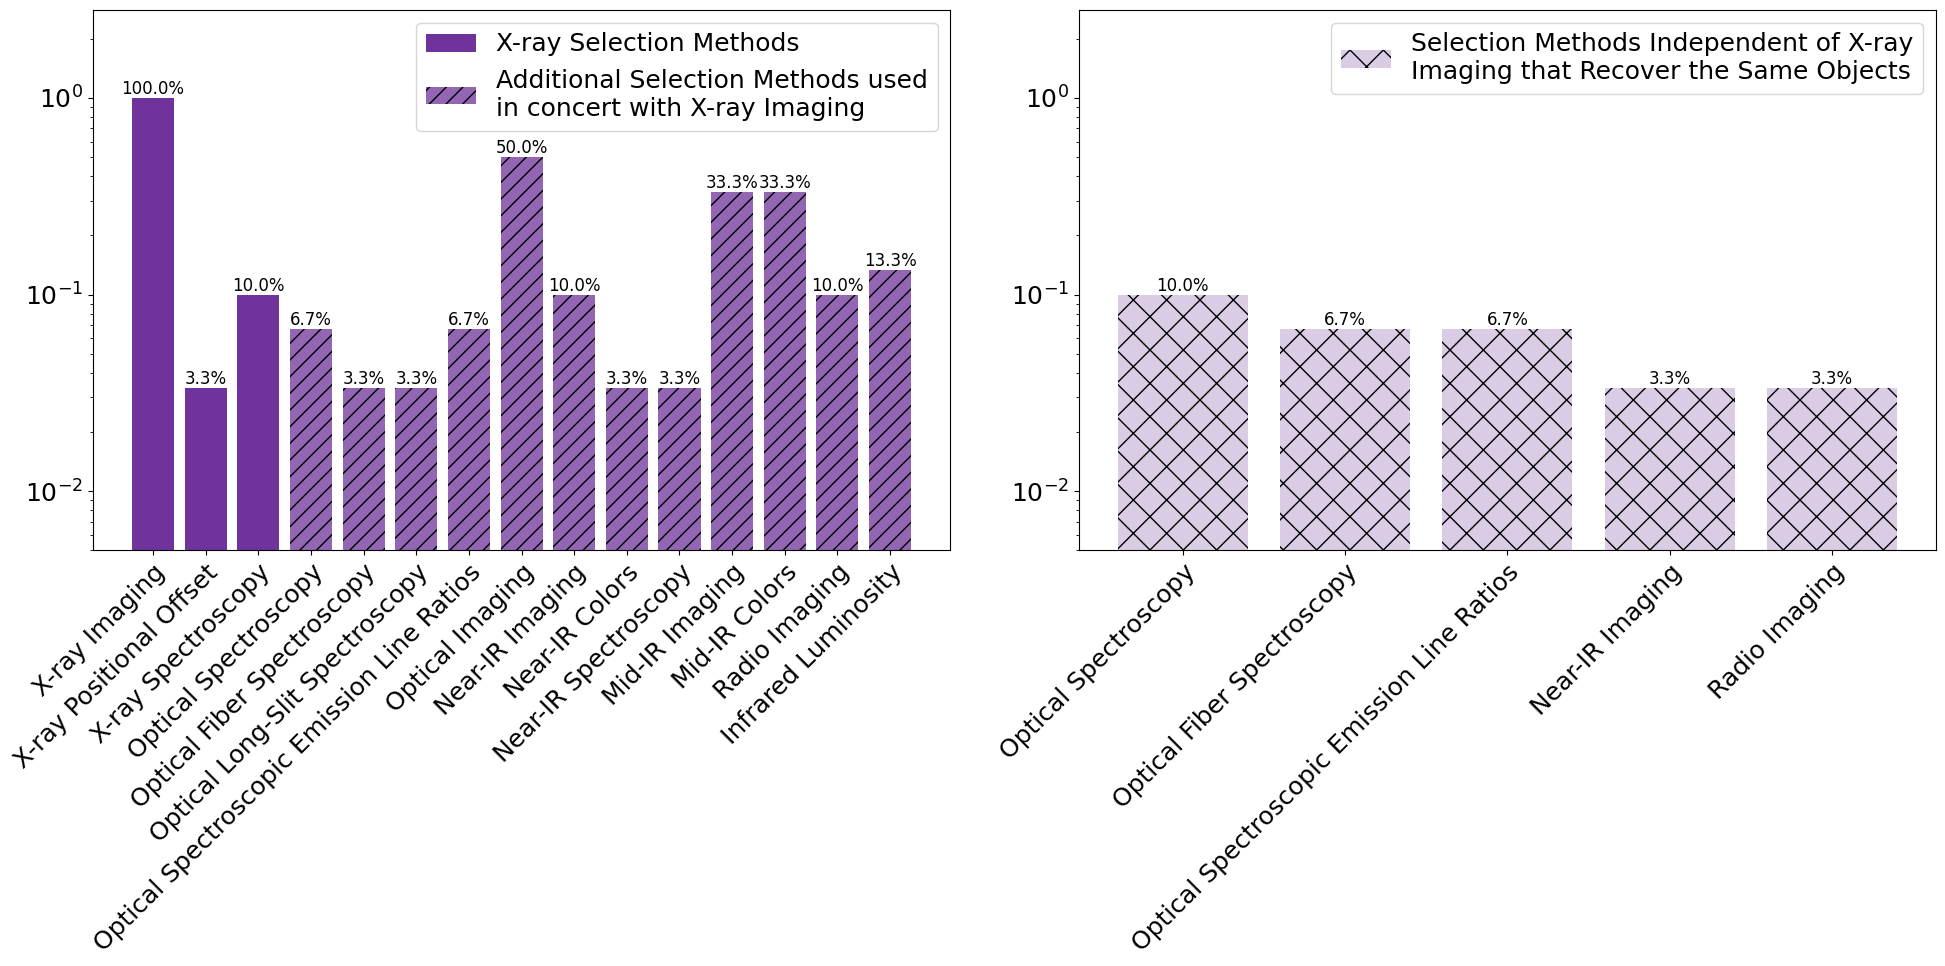

In [49]:
# and here we'll work on the X-ray imaging....
#('Infrared', 'Luminosity') *
#('Mid-IR', 'Colors') *
#('Mid-IR', 'Imaging') *
#('Near-IR', 'Colors') *
#('Near-IR', 'Imaging') *
#('Near-IR', 'Spectroscopy') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'Imaging')
#('Optical', 'Long-Slit Spectroscopy') *
#('Optical', 'Spectroscopic Emission Line Ratios')*
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Broad Spectroscopic Emission Lines') *
#('Radio', 'Imaging')*

#('X-ray', 'Imaging') *
#('X-ray', 'Positional Offset') *
#('X-ray', 'Spectroscopy') *

band = ['X-ray']
tech1 = ['Imaging','Positional Offset','Spectroscopy']
band2 = ['Optical']
tech2 = ['Spectroscopy','Fiber Spectroscopy','Long-Slit Spectroscopy','Spectroscopic Emission Line Ratios','Imaging']
band4 = ['Near-IR']
tech4 = ['Imaging','Colors','Spectroscopy']
band5 = ['Mid-IR']
tech5 = ['Imaging','Colors']
band6 = ['Radio']
tech6 = ['Imaging']
band7 = ['Infrared']
tech7 = ['Luminosity']

bars = tech1
num = []

filter_selection = get_selection_method('X-ray', 'Imaging')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm)    

tech = []
for i in tech1:
    tech.append('X-ray '+str(i))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))  
plt.rcParams.update({'font.size': 18})

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='X-ray Selection Methods')
for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')



techadd = []
num = []
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy':
            num.append((len(df_selection2)-3)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        elif m=='Fiber Spectroscopy' or m=='Spectroscopic Emission Line Ratios':
            num.append((len(df_selection2)-2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

#tech = []
for i in tech2:
    techadd.append('Optical '+str(i))


for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

for i in tech4:
    techadd.append('Near-IR '+str(i))

for k in band5:
    for m in tech5:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-1)/norm) # subtracting one for Imanishi+

for i in tech5:
    techadd.append('Mid-IR '+str(i))
    
for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-1)/norm) # subtracting one for Dutta+2018

for i in tech6:
    techadd.append('Radio '+str(i))
    
for k in band7:
    for m in tech7:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)

for i in tech7:
    techadd.append('Infrared '+str(i))
    
bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with X-ray Imaging')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


ax1.legend()
    
# 2 object independenelty selected via optical spc, fiber spec, spec ratios (liu 2011/len2018)
# 1 object independently selected in radio (dutta, J1036)
# 1 independetly selected in near-IR imaging
# 1 object (comerford 2015) selected via optical spectroscopy independently


tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy',
         'Optical Spectroscopic Emission Line Ratios',\
         'Near-IR Imaging','Radio Imaging']
num = [3/norm,2/norm,2/norm,1/norm,1/norm]


bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of X-ray\nImaging that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_xrayimaging.pdf', dpi=150)
plt.show()


In [67]:
g1 = gandalf.copy()
for index, row in g1.iterrows():
    if 'Near-IR Imaging' not in row['Processed Selection Method']:
        g1.drop(index, inplace=True)


g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method','Sep(kpc)']]


# 2 object independenelty selected via optical spc, fiber spec, spec ratios (liu 2011/len2018)
# 1 object independently selected in radio (dutta, J1036)
# 1 independetly selected in near-IR imaging
# 1 object (comerford 2015) selected via optical spectroscopy independently

# I have now adjusted optical imaging --> near-IR imaging for RX J0921+4529A
# I have added Optical Imaging to NGC 5252

# I thik all others are okay? For now at least ...


,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method,Sep(kpc)
2723,3C 294 W,Stockton+2004 ; Heidt+2019,Dual AGN Candidate,-99,-99,"{'Near-IR': ['Imaging'], 'Radio': ['Imaging'],...","{'Near-IR': ['Imaging'], 'Radio': ['Imaging'],...",{},7.60352
2767,I20210N,Piconcelli+2010 ; Imanishi+2014,Dual AGN,-99,-99,"{'Near-IR': ['Colors', 'Imaging'], 'Optical': ...","{'Near-IR': ['Colors', 'Imaging'], 'Optical': ...","{'Near-IR': ['Colors', 'Imaging'], 'Optical': ...",13.36243
3066,Mrk 273 N,Iwasawa+2011 ; U+2013 ; Imanishi+2014 ; Barrow...,Dual AGN,-99,-99,"{'Near-IR': ['Imaging', 'Spectroscopy'], 'X-ra...","{'Near-IR': ['Imaging', 'Spectroscopy'], 'Opti...","{'Near-IR': ['Imaging', 'Spectroscopy'], 'Opti...",-99.00000


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Radio', 'Imaging')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

# X-ray imaging covers the same sets of methods as X-ray spectroscopy but also covers additional sets not covered \
# by X-ray spectroscopy. 
# We'll refer to X-ray Imaging as the overarching method



In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/251307148.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/251307148.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gandalf.drop(index, inplace=True)
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/251307148.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

118
Radio Imaging 118
Radio Double Sources 53
Radio Double Jet 2
Radio Radio-Infrared Colors 2
Radio Radio-Optical Positional Offsets 48
Optical Imaging 102
Optical Radio-Optical Positional Offsets 48
Optical Spectroscopy 7
Optical Long-Slit Spectroscopy 2
Optical Slit Spectroscopy 1
Near-IR Imaging 1
Infrared Imaging 2
Infrared Radio-Infrared Colors 2
X-ray Imaging 4


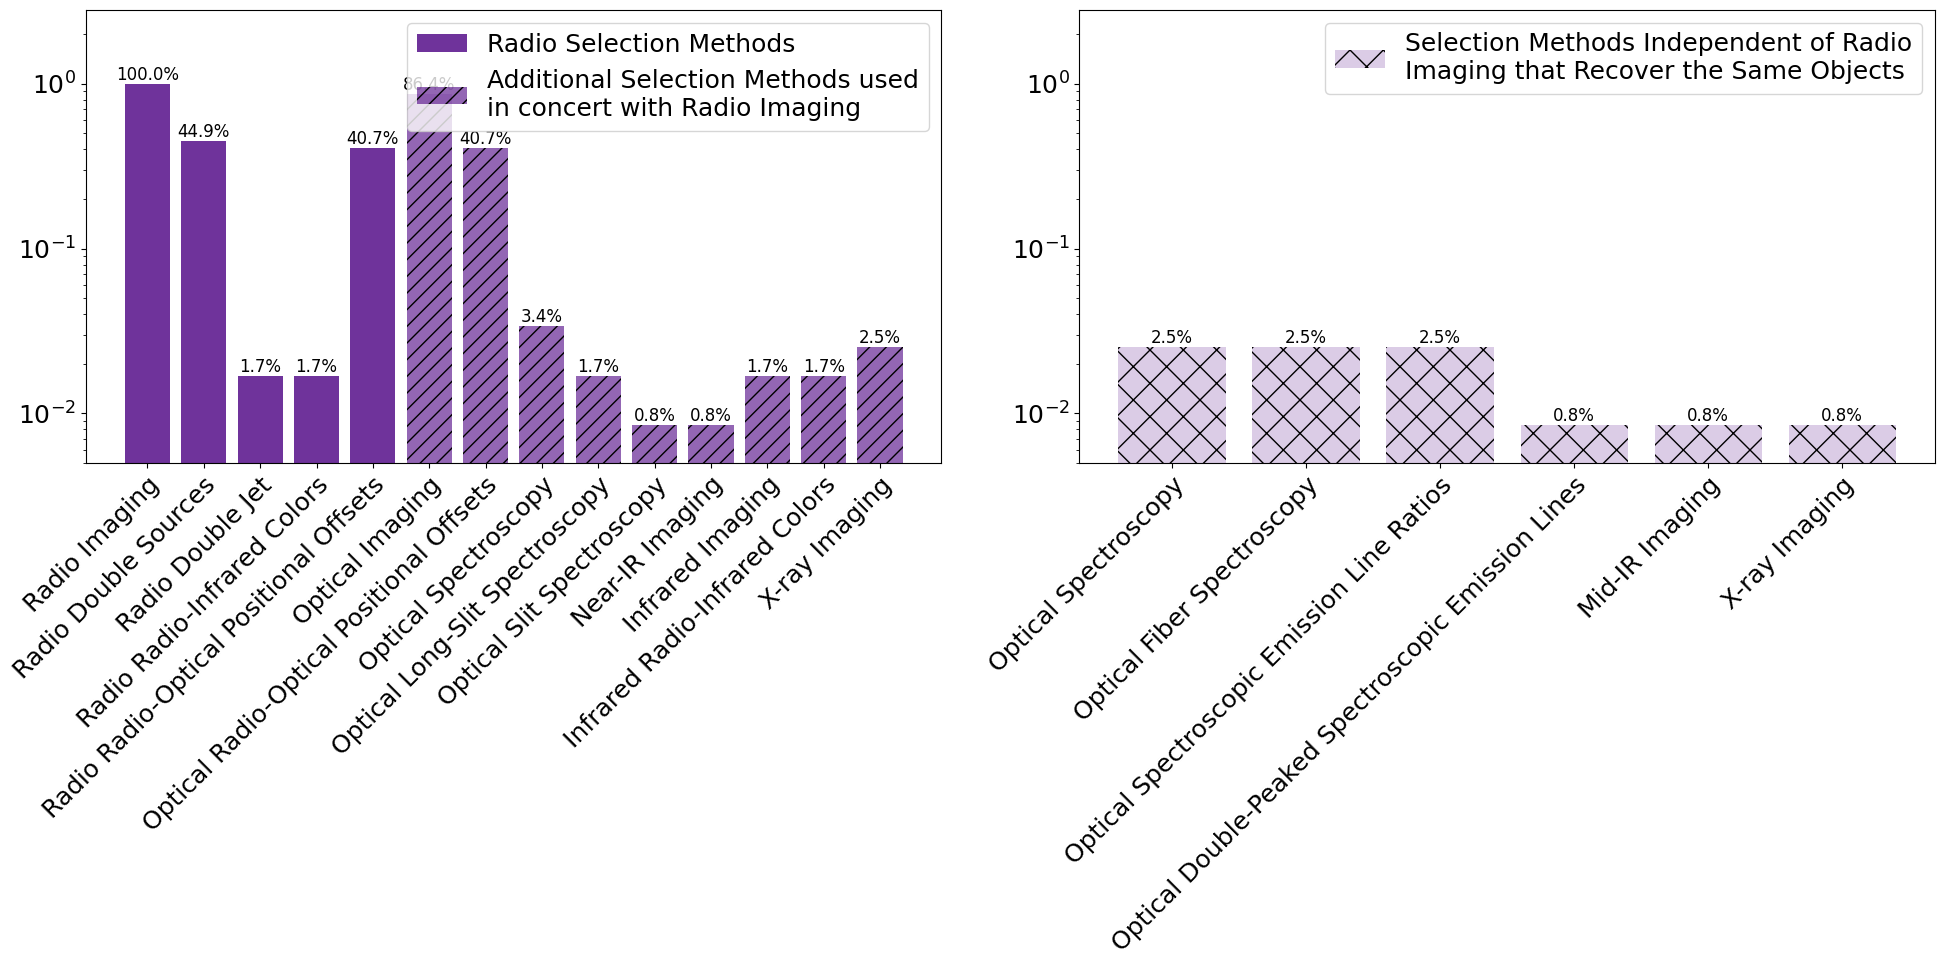

In [48]:
# and here, focusing on radio imaging
#('Infrared', 'Imaging') * 
#('Infrared', 'Radio-Infrared Colors') *
#('Mid-IR', 'Colors') *
#('Mid-IR', 'Imaging') *
#('Near-IR', 'Imaging') *
#('Optical', 'Colors') *
#('Optical', 'Double-Peaked Spectroscopic Emission Lines') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'Long-Slit Spectroscopy') *
#('Optical', 'Radio-Optical Positional Offsets') *
#('Optical', 'Slit Spectroscopy') *
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Optical', 'Velocity Offset Narrow Spectroscopic Emission Lines') *
#('Radio', 'Double Jet') *
#('Radio', 'Double Sources') *
#('Radio', 'Imaging') *
#('Radio', 'Radio-Infrared Colors') *
#('Radio', 'Radio-Optical Positional Offsets') *
#('Radio', 'X-Shaped Source') *
#('X-ray', 'Imaging') *
#('X-ray', 'Spectroscopy') *

band = ['Radio']
tech1 = ['Imaging','Double Sources','Double Jet','Radio-Infrared Colors','Radio-Optical Positional Offsets'] #'X-Shaped Source'

band2 = ['Optical']
tech2 = ['Imaging','Radio-Optical Positional Offsets','Spectroscopy',\
         'Long-Slit Spectroscopy','Slit Spectroscopy'] #'Spectroscopic Emission Line Ratios' 'Fiber Spectroscopy',
#'Colors' 'Velocity Offset Narrow Spectroscopic Emission Lines' # 'Double-Peaked Spectroscopic Emission Lines'
#band2 = ['X-ray']
#tech2 = ['Imaging','Positional Offset','Spectroscopy']
#band3 = ['Hard X-ray']
#tech3 = ['BAT Selection']
band4 = ['Near-IR']
tech4 = ['Imaging',]
band5 = ['Mid-IR']
tech5 = ['Imaging','Colors']
band6 = ['X-ray']
tech6 = ['Imaging']
band7 = ['Infrared']
tech7 = ['Imaging','Radio-Infrared Colors']

bars = tech1
num = []

filter_selection = get_selection_method('Radio', 'Imaging')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
# objects that need to be clipped out because the radio imaging selection is not actually relevant too the dual \
# classification:
balrog = ['J080529.88+241004.4','J114016.98+174340.4','SDSSJ152806.63+132345.8 / J1528+1323',\
          'J083127.50+321926.9 / B2 0828+32','J094124+394441 / 3C223.1','SDSS J1048+0055',\
         'J161847.93+215925.4','J003636.21+004853.45','J155416.08+381132.64','J091405.28+171554.36',\
         'J131638.16+242732.40','J014719.27-085119.58','J011341.11+010608.50']
for index, row in gandalf.iterrows():
    if row['Name1'] in balrog:
        gandalf.drop(index, inplace=True)
gandalf.reset_index(drop=True, inplace=True)
        
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm)   
        print(str(i)+' '+str(j)+' '+str(len(df_selection)))

tech = []
for i in tech1:
    tech.append('Radio '+str(i))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

#ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Radio Selection Methods')
for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   

techadd=[]
num=[]

for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy':
            num.append((len(df_selection2)-3)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

for i in tech2:
    techadd.append('Optical '+str(i))

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))
        
        
for i in tech4:
    techadd.append('Near-IR '+str(i))

for k in band7:
    for m in tech7:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech7:
    techadd.append('Infrared '+str(i))

for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        #print(df_selection2)
        num.append((len(df_selection2)-1)/norm) # subtracted one to remove the one object
        print(str(k)+' '+str(m)+' '+str(len(df_selection2)))

for i in tech6:
    techadd.append('X-ray '+str(i))


bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Radio Imaging')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


ax1.legend()
# and down below here we'll focus on the methods that are independent of radio imaigng
#mid-ir imaging and colors used independently
#2 instances of spectroscopic emission line ratios used independently
#double-peak source instance (1) is independent
#X-ray imaging was used in 3/4 cases, one x-ray instacnes was independent
#x-ray spectroscopy instacen has been removed from the individual target table


tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy',
         'Optical Spectroscopic Emission Line Ratios',\
         'Optical Double-Peaked Spectroscopic Emission Lines','Mid-IR Imaging','X-ray Imaging']
num = [3/norm,3/norm,3/norm,1/norm,1/norm,1/norm]

bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Radio\nImaging that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)


#ax2.text(0.05, 0.95, 'Independent Selection Methods', fontsize=18, transform=ax2.transAxes)

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_radioimaging.pdf', dpi=150)
plt.show()



In [47]:
g1 = gandalf.copy()
for index, row in g1.iterrows():
    if 'Radio Double Jet' not in row['Processed Selection Method']:
        g1.drop(index, inplace=True)


g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method','Sep(kpc)']]


#mid-ir imaging and colors used independently
#3 instances of spectroscopic emission line ratios used independently
#double-peak source instance (1) is independent
#X-ray imaging was used in 3/4 cases
#one x-ray instances was independent
#x-ray spectroscopy instacen has been removed from the individual target table

# need to remove radio imaging from SDSS J1048+0055 selection method

,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method,Sep(kpc)
99,3C 75 NE,Owen+1985 ; Hudson+2006,Dual AGN,-99,-99,"{'Radio': ['Double Jet', 'Imaging']}","{'Radio': ['Double Jet', 'Imaging'], 'X-ray': ...","{'Radio': ['Imaging'], 'X-ray': ['Imaging']}",7.765413
112,PKS 1155+251 C,Liu+2014 ; Yang+2017,Dual AGN Candidate,-99,-99,"{'Radio': ['Double Jet', 'Double Sources', 'Im...","{'Radio': ['Double Jet', 'Double Sources', 'Im...",{},-99.000000


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Hard X-ray', 'BAT Selection')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

# X-ray imaging covers the same sets of methods as X-ray spectroscopy but also covers additional sets not covered \
# by X-ray spectroscopy. 
# We'll refer to X-ray Imaging as the overarching method



In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

12
Optical Imaging 0
Optical Spectroscopy 1
Optical Fiber Spectroscopy 1
Optical Spectroscopic Emission Line Ratios 1


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/510036635.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/510036635.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/510036635.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/510036635.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


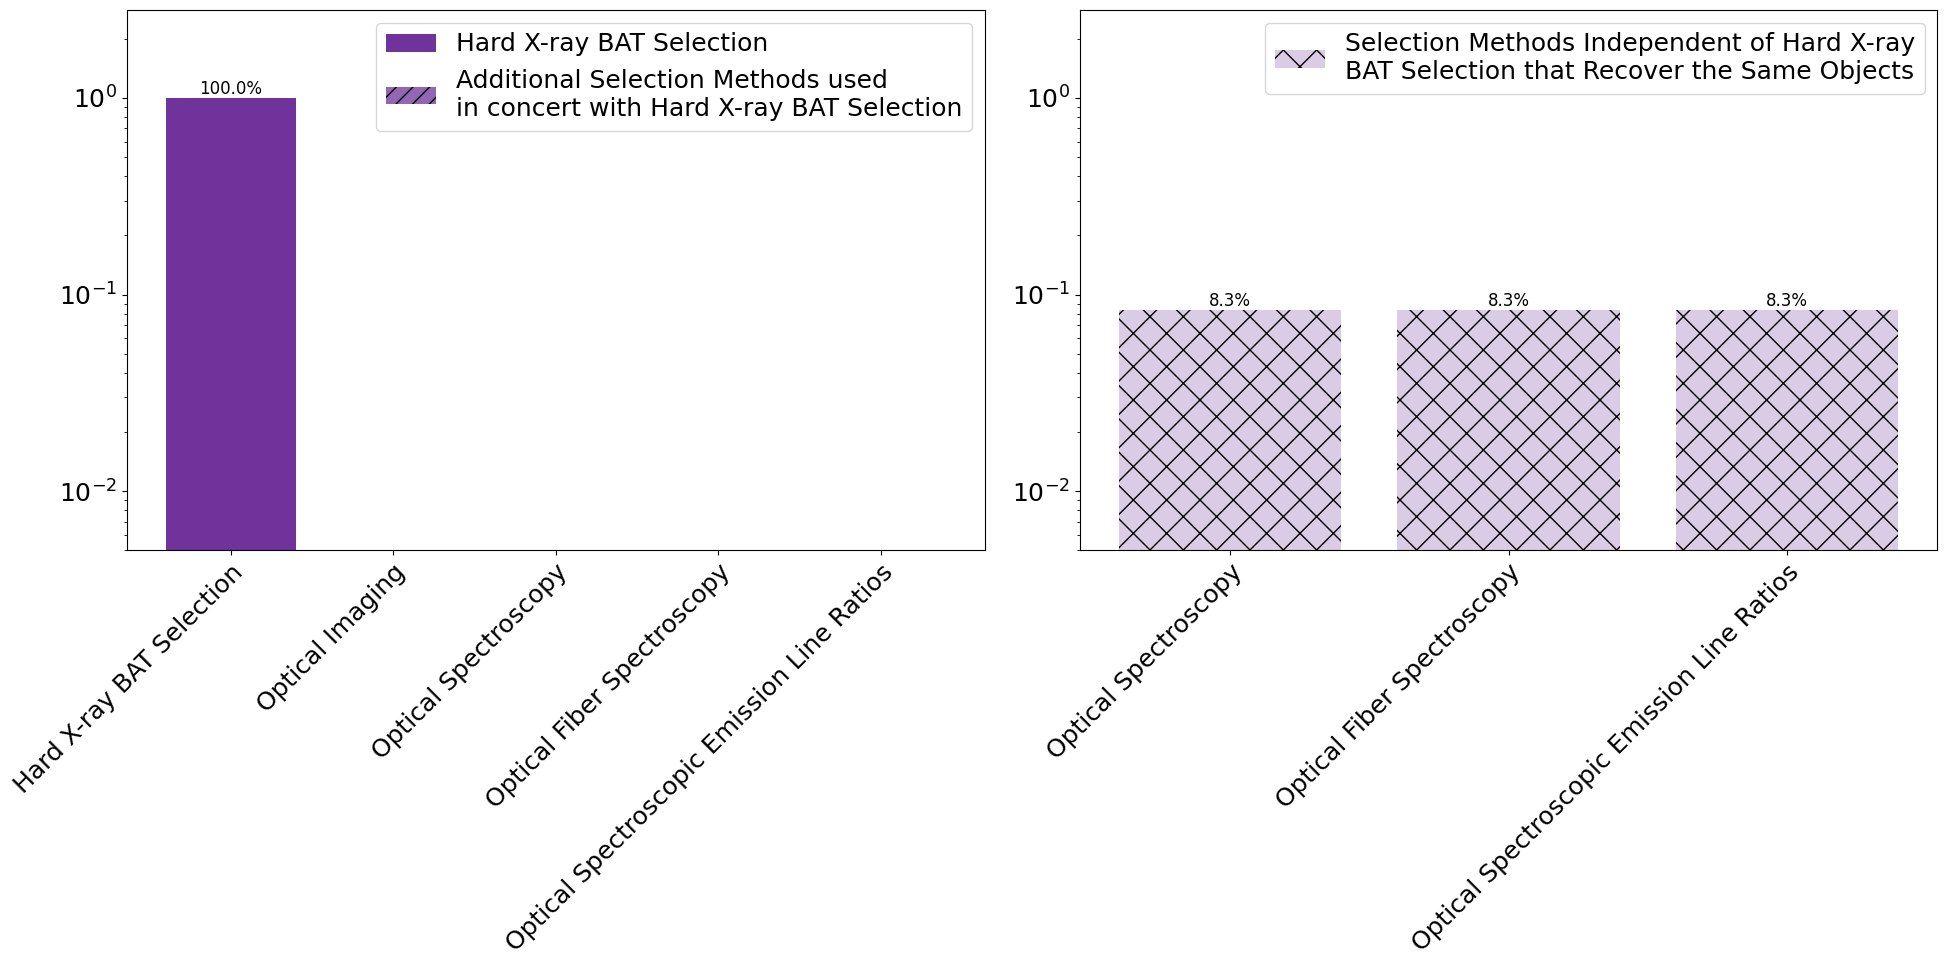

In [12]:
# and here we're going to check hard X-ray selection
#('Hard X-ray', 'BAT Selection') *
# ('Optical', 'Fiber Spectroscopy') *
# ('Optical', 'Spectroscopic Emission Line Ratios') *
# ('Optical', 'Spectroscopy') *
# ('X-ray', 'BAT Selection') *


band = ['Hard X-ray']
tech1 = ['BAT Selection']

band2 = ['Optical']
tech2 = ['Imaging','Spectroscopy','Fiber Spectroscopy',\
         'Spectroscopic Emission Line Ratios'] #  is out for now but we will have to put it back in
band4 = ['Near-IR']
tech4 = ['Imaging','Colors']
band6 = ['X-ray']
tech6 = ['Imaging','Spectroscopy']
band7 = ['Radio']
tech7 = ['Imaging']

bars = tech1
num = []

filter_selection = get_selection_method('Hard X-ray', 'BAT Selection')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm)    

tech = []
for i in tech1:
    tech.append('Hard X-ray '+str(i))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Hard X-ray BAT Selection')
for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')



#Optical spectroscopy / fiber spectroscopy / spec ratios used for 1 independently
techadd = []
num = []
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy' or m=='Fiber Spectroscopy' or m=='Spectroscopic Emission Line Ratios':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

#tech = []
for i in tech2:
    techadd.append('Optical '+str(i))


# ******************
# ******************
# ******************  WHEN WE ADD IN THE OPTICAL SELECTION TO BAT SELECTION, WE WILL NEED TO REMOVE THE -1 ABOVE \
# ****************** BECAUSE MIGHT WOULD HAVE SELECTED THE SAME OBJECT AS LIU USING FIBER SPECTRA
# ******************
# ******************

    
bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Hard X-ray BAT Selection')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0:
        percentage = f'{100*height:.1f}%'
        
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax1.legend()


tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy',
         'Optical Spectroscopic Emission Line Ratios']
num = [1/norm,1/norm,1/norm]

bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Hard X-ray\nBAT Selection that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)


#ax2.text(0.05, 0.95, 'Independent Selection Methods', fontsize=18, transform=ax2.transAxes)

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_hardxrayimaging.pdf', dpi=150)
plt.show()



In [ ]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]

# 1 object was selected independetly using optical spec, fiber spec, spec ratios

# for now there doesn't seem to be much other overlap

# we need to add optical imaging 


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Mid-IR', 'Imaging')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

# X-ray imaging covers the same sets of methods as X-ray spectroscopy but also covers additional sets not covered \
# by X-ray spectroscopy. 
# We'll refer to X-ray Imaging as the overarching method



In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

111
Optical Imaging 108
Optical Colors 31
Optical Spectroscopy 6
Optical Long-Slit Spectroscopy 1
Optical Slit Spectroscopy 1
Optical IFU Imaging 1
Optical IFU Spectroscopy 1
Optical Astrometry 1
Optical Optical-Mid-IR Colors 19


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2265824079.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2265824079.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2265824079.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_2668/2265824079.py:144: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


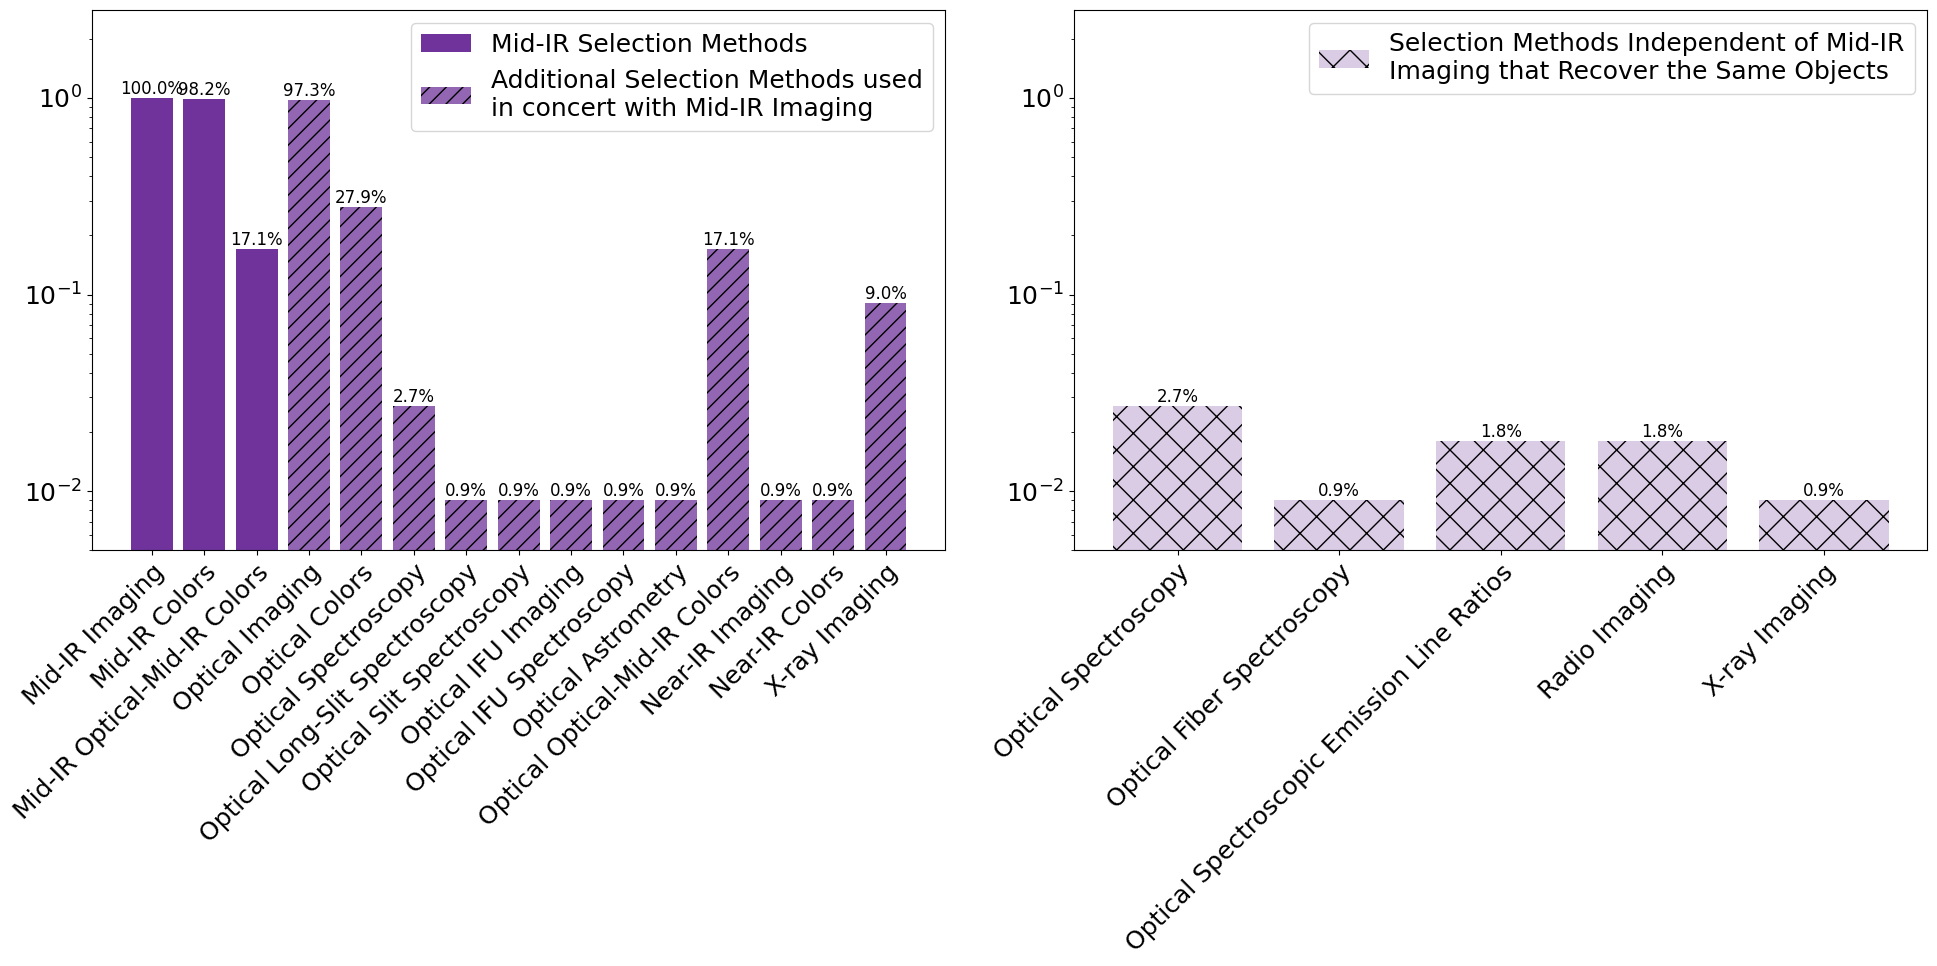

In [14]:
# and here we're going to do mid-IR colors
#('Mid-IR', 'Colors') *
#('Mid-IR', 'Imaging') *
#('Mid-IR', 'Optical-Mid-IR Colors') *
#('Near-IR', 'Colors') *
#('Near-IR', 'Imaging') *
#('Optical', 'Astrometry') *
#('Optical', 'Colors') *
#('Optical', 'Fiber Spectroscopy') *
#('Optical', 'IFU Imaging') *
#('Optical', 'IFU Spectroscopy') *
#('Optical', 'Imaging') *
#('Optical', 'Long-Slit Spectroscopy') *
#('Optical', 'Optical-Mid-IR Colors') *
#('Optical', 'Slit Spectroscopy') *
#('Optical', 'Spectroscopic Emission Line Ratios') *
#('Optical', 'Spectroscopy') *
#('Radio', 'Imaging') *
#('X-ray', 'Imaging') *
#('X-ray', 'Spectroscopy') *

band = ['Mid-IR']
tech1 = ['Imaging','Colors','Optical-Mid-IR Colors']
band2 = ['Optical']
tech2 = ['Imaging','Colors','Spectroscopy',\
         'Long-Slit Spectroscopy','Slit Spectroscopy',\
         'IFU Imaging','IFU Spectroscopy','Astrometry','Optical-Mid-IR Colors'] 
# 'Fiber Spectroscopy'
#'Spectroscopic Emission Line Ratios'
band4 = ['Near-IR']
tech4 = ['Imaging','Colors']
band6 = ['X-ray']
tech6 = ['Imaging']
band7 = ['Radio']
tech7 = ['Imaging']

bars = tech1
num = []

filter_selection = get_selection_method('Mid-IR', 'Imaging')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm)    

tech = []
for i in tech1:
    tech.append('Mid-IR '+str(i))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Mid-IR Selection Methods')
for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


techadd = []
num = []
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy':
            num.append((len(df_selection2)-3)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        elif m=='Fiber Spectroscopy':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))
        # added a for loop here to remove the numbers of objects that shiould be in tehe second panel

for i in tech2:
    techadd.append('Optical '+str(i))

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

for i in tech4:
    techadd.append('Near-IR '+str(i))

for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append((len(df_selection2)-1)/norm) # removing one, J0841

for i in tech6:
    techadd.append('X-ray '+str(i))
    

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Mid-IR Imaging')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax1.legend()
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Mid-IR Imaging', transform=ax1.transAxes, fontsize=18)

# 1 object selected via optical spec/ fiber spec / spec ratios was independent *
# 1 addl object selected via optical orginally (just optical spectroscopy in our table) --> mrk 463 *
# 1 addl object selected via optical spec (this is comerford) *

# one object overlap with barrows and comerford \
# this ends up giving you an overlap for: X-ray imaging, there should also be an optical spectroscopy overlap but \
# we have not yet added that in as a selection for j0841

# 2 object with radio imaging is an overlap and is independent for radio (Dutta+2018 for Mrk 463 and J1036)

  
tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy','Optical Spectroscopic Emission Line Ratios',\
         'Radio Imaging','X-ray Imaging']
num = [3/norm,1/norm,2/norm,2/norm,1/norm]


bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Mid-IR\nImaging that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)

# 'Spectroscopic Emission Line Ratios' needs to be added twice (once premptively for the Comerford target)
# 'Radio Imaging' has two instances
# X-ray has one independent

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_midIRimaging.pdf', dpi=150)
plt.show()




In [29]:
g1 = gandalf.copy()
for index, row in g1.iterrows():
    if 'Optical Spectroscopy' not in row['Processed Selection Method']:
        g1.drop(index, inplace=True)


g1[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]


# 1 object selected via optical spec/ fiber spec / spec ratios was independent
# 1 addl object selected via optical orginally (just optical spectroscopy in our table) --> mrk 463
# 1 addl object selected via optical spec  (this is comerford)

# one object overlap with barrows and comerford \
# this ends up giving you an overlap for: X-ray imaging, there should also be an optical spectroscopy overlap but \
# we have not yet added that in as a selection for j0841


# 2 object with radio imaging is an overlap and is independent for radio (Dutta+2018 for Mrk 463 and J1036)

# 




,Name1,Paper(s),Primary System Type,Secondary System Type,Tertiary System Type,Parsed Selection Method,Parsed Analysis Method,Parsed Confirmation Method
539,J114753.63+094552.0 / J1147+0945 S,Liu+2011b ; Satyapal+2017 ; Pfeifle+2019a,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
2727,Mrk 463E,Bianchi+2008 ; Wang+2010 ; Imanishi+2014 ; Dut...,Dual AGN,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Optical': ['Spectroscopy'], 'X-ray': ['Imagi..."
2748,X1 (Eastern),Ellison+2017 ; Fu+2018,Dual AGN,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [..."
2752,J1036+0221,Satyapal+2017 ; Dutta+2018 ; Pfeifle+2019,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Optical': [...",{}
2769,GQ 1114+1549A,Altamura+2020,Dual AGN,-99,-99,"{'Mid-IR': ['Colors', 'Imaging'], 'Near-IR': [...","{'Mid-IR': ['Colors', 'Imaging'], 'Near-IR': [...","{'Optical': ['Imaging', 'Spectroscopy']}"
3077,J1010+1413,Goulding+2019,Dual AGN Candidate,-99,-99,"{'Mid-IR': ['Imaging'], 'Optical': ['Spectrosc...","{'Mid-IR': ['Imaging'], 'Near-IR': ['Imaging']...",{}


In [ ]:
# now we're going to work on making individual plot comparisons for the dual AGN candidates....
filter_selection = get_selection_method('Near-IR', 'Imaging')
df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]

df_selection['Parsed Selection Method'].unique()

# X-ray imaging covers the same sets of methods as X-ray spectroscopy but also covers additional sets not covered \
# by X-ray spectroscopy. 
# We'll refer to X-ray Imaging as the overarching method



In [ ]:
data = df_selection['Parsed Selection Method'].unique()
dicts = [ast.literal_eval(d) for d in data]

# Step 2: Aggregate all entries into a single list
all_entries = []
for d in dicts:
    for key, values in d.items():
        for value in values:
            all_entries.append((key, value))

# Step 3: Remove duplicates by converting list of tuples into a set
unique_entries = set(all_entries)

# Optionally, convert back to list of dictionaries or keep as list of tuples
#unique_dicts = [{k: v} for k, v in unique_entries]

#print(unique_dicts)
unique_entries_list = list(unique_entries)

# Sort the list by the first element of each tuple (the key) and then by the second element (the value)
sorted_unique_entries = sorted(unique_entries_list, key=lambda x: (x[0], x[1]))

for i in sorted_unique_entries:
    print(i)

8
Optical Imaging 2
Optical Colors 1
Optical Spectroscopy 1
Optical Slit Spectroscopy 1
Optical Spectroscopic Emission Line Ratios 0
Optical Astrometry 1


/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/2996381255.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/2996381255.py:117: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/2996381255.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
/var/folders/_n/4v22wftn7354wlkmn_g7rtdr0000gn/T/ipykernel_20384/2996381255.py:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


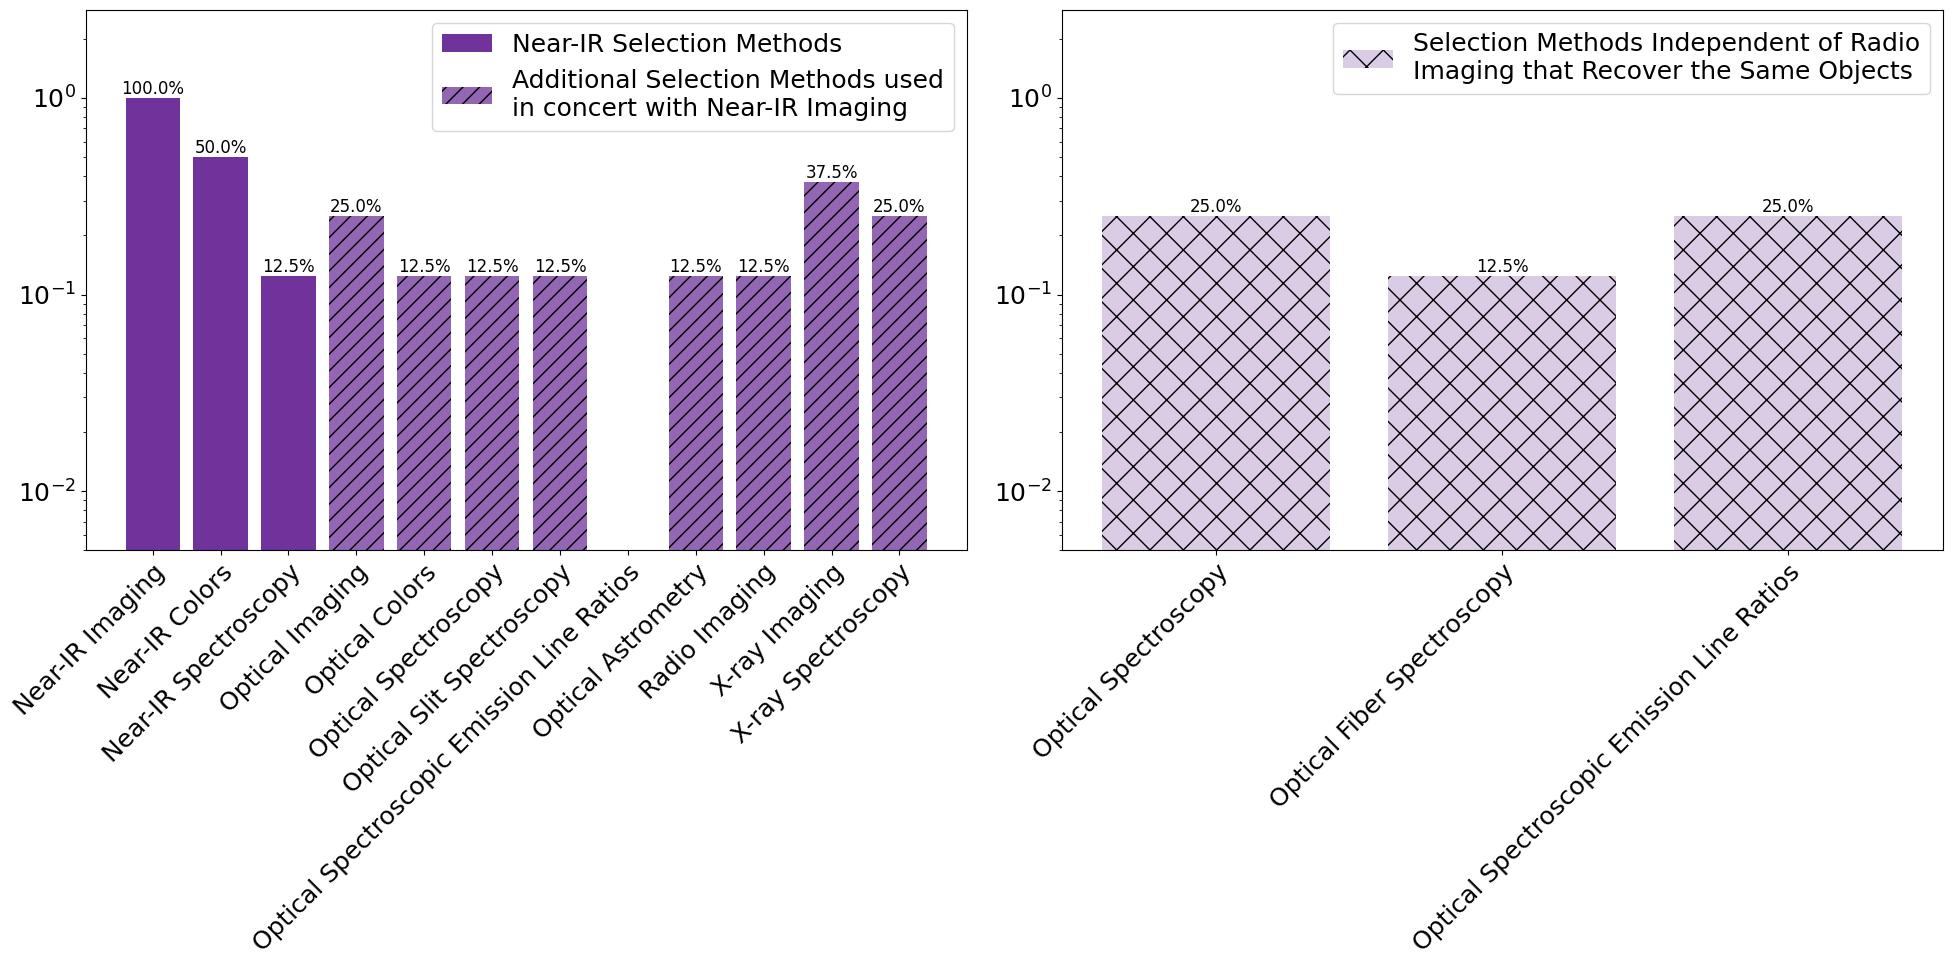

In [11]:
# and finally near-IR imaging...
# ('Mid-IR', 'Colors')
# ('Mid-IR', 'Imaging')
# ('Near-IR', 'Colors') *
# ('Near-IR', 'Imaging') *
# ('Near-IR', 'Spectroscopy') *
# ('Optical', 'Astrometry') *
# ('Optical', 'Colors') *
# ('Optical', 'Fiber Spectroscopy') *
# ('Optical', 'Imaging') *
# ('Optical', 'Slit Spectroscopy') *
# ('Optical', 'Spectroscopic Emission Line Ratios') *
# ('Optical', 'Spectroscopy') *
# ('Radio', 'Imaging') *
# ('X-ray', 'Imaging') *
# ('X-ray', 'Spectroscopy') *

band = ['Near-IR']
tech1 = ['Imaging','Colors','Spectroscopy']

band2 = ['Optical']
tech2 = ['Imaging','Colors','Spectroscopy',\
         'Slit Spectroscopy','Spectroscopic Emission Line Ratios',\
         'Astrometry'] # 'Fiber Spectroscopy'
#band2 = ['X-ray']
#tech2 = ['Imaging','Positional Offset','Spectroscopy']
#band3 = ['Hard X-ray']
#tech3 = ['BAT Selection']
band4 = ['Radio']
tech4 = ['Imaging']
#band5 = ['Mid-IR']
#tech5 = ['Imaging','Colors']
band6 = ['X-ray']
tech6 = ['Imaging','Spectroscopy']
#band7 = ['Radio']
#tech7 = ['Imaging']

bars = tech1
num = []

filter_selection = get_selection_method('Near-IR', 'Imaging')
gandalf = MAC1[MAC1.apply(filter_selection, axis=1)]
print(len(gandalf))
norm = len(gandalf)

for i in band:
    for j in tech1:
        filter_selection = get_selection_method(str(i), str(j))
        df_selection = gandalf[gandalf.apply(filter_selection, axis=1)]
        num.append(len(df_selection)/norm)    

tech = []
for i in tech1:
    tech.append('Near-IR '+str(i))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
plt.rcParams.update({'font.size': 18})

bars = ax1.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.8, label='Near-IR Selection Methods')
for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')

   
techadd=[]
num=[]
for k in band2:
    for m in tech2:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        if m=='Spectroscopy':
            num.append((len(df_selection2)-2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)-2))
        elif m=='Fiber Spectroscopy':
            num.append((len(df_selection2)-1)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)-1))
        elif m=='Spectroscopic Emission Line Ratios':
            num.append((len(df_selection2)-2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)-2))
        else:
            num.append(len(df_selection2)/norm)
            print(str(k)+' '+str(m)+' '+str(len(df_selection2)))
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))
        # added a for loop here to remove the numbers of objects that shiould be in tehe second panel
        
for i in tech2:
    techadd.append('Optical '+str(i))

for k in band4:
    for m in tech4:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)
        #print(str(len(df_selection)) + ' ' + str(i) + ' ' + str(j) + ' ' + str(k))

for i in tech4:
    techadd.append('Radio '+str(i))


for k in band6:
    for m in tech6:
        filter_selection = get_selection_method(str(k), str(m))
        df_selection2 = gandalf[gandalf.apply(filter_selection, axis=1)] 
        num.append(len(df_selection2)/norm)

for i in tech6:
    techadd.append('X-ray '+str(i))

bars = ax1.bar(techadd, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.6, hatch='//', label='Additional Selection Methods used\nin concert with Near-IR Imaging')
#xlabels =  ax1.get_xticklabels()
ax1.set_xticklabels(tech+techadd, rotation=45, ha='right', rotation_mode='anchor')
#ax1.text(0.2, 0.9, 'Object Class: Dual AGN/SMBH Candidates\nSelection Breakdown: Radio Imaging', transform=ax1.transAxes, fontsize=18)

for bar in bars:
    height = bar.get_height()
    if height>0:
        percentage = f'{100*height:.1f}%'
        
        ax1.text(bar.get_x() + bar.get_width() / 2, height, percentage,
                ha='center', va='bottom', fontsize=12)
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')


ax1.legend()

# optical spec, fiber spec, optical line ratios used once independently
# Spectroscopic Emission Line Ratios', 'Spectroscop used once independnetly (piconcelli)
#--> we need to remove X-ray imaging and spectroscopy from the selection method because they followed up in xrays \
#    BECAUSE of optical type *****

# I'm keeping the X-ray as a combination select method, because Mrk 273 was really selected using both x-rays\
# and near-IR (and honestly also the optical... we can worry about corrections later... )

tech = ['Optical Spectroscopy','Optical Fiber Spectroscopy','Optical Spectroscopic Emission Line Ratios']
num = [2/norm,1/norm,2/norm]

bars = ax2.bar(tech, num, width=0.8, bottom=None, align='center', data=None, log=True, color='indigo', alpha=0.2, hatch='x', label='Selection Methods Independent of Radio\nImaging that Recover the Same Objects')
xlabels = ax2.get_xticklabels()
ax2.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
ax2.legend()

for bar in bars:
    height = bar.get_height()
    percentage = f'{100*height:.1f}%'
    
    ax2.text(bar.get_x() + bar.get_width() / 2, height, percentage,
            ha='center', va='bottom', fontsize=12)

#ax2.text(0.05, 0.95, 'Independent Selection Methods', fontsize=18, transform=ax2.transAxes)

ax1.set_ylim([0.005, 2.8]) 
ax2.set_ylim([0.005, 2.8]) 

plt.tight_layout()
plt.savefig('dualagn_breakdown_nearIRimaging.pdf', dpi=150)
plt.show()





In [ ]:
gandalf[['Name1','Paper(s)','Primary System Type','Secondary System Type','Tertiary System Type',\
        'Parsed Selection Method','Parsed Analysis Method','Parsed Confirmation Method']]


# optical spec, fiber spec, optical line ratios used once independently
# Spectroscopic Emission Line Ratios', 'Spectroscop used once independnetly (piconcelli)
#--> we need to remove X-ray imaging and spectroscopy from the selection method because they followed up in xrays \
#    BECAUSE of optical type

# I'm keeping the X-ray as a combination select method, because Mrk 273 was really selected using both x-rays\
# and near-IR (and honestly also the optical... we can worry about corrections later... )


In [ ]:
# and now checking the confirmation methods for dual AGNs

MACconf = MAC1[MAC1['ST1 Confidence Flag']==1]
print(len(MACconf))
methods = MACconf['Processed Confirmation Method'].dropna().str.split(' / ')

# Flatten the lists and find unique labels
unique_methods = set(method for sublist in methods for method in sublist)

print("Unique Confirmation methods:", unique_methods)
print(len(unique_methods))


In [ ]:
tech = ['Mid-IR Colors', \
        'Optical Slitless Spectroscopy', \
        'X-ray Spectroscopy', \
        'Optical Double-Peaked Spectroscopic Emission Lines', \
        'Radio Double Sources', 'Optical IFU Imaging', \
        'X-ray Imaging', 'UV Spectroscopy', 'UV Imaging', 'Optical Spectroscopy', \
        'Near-IR Spectroscopy', 'Optical Spectroscopic Emission Line Ratios', \
        'Near-IR IFU Imaging', 'Near-IR Imaging', ' Optical Slit Spectroscopy', \
        'Optical Fiber Spectroscopy', 'Submillimeter Imaging', 'Optical Narrow-Band Imaging', \
        'Near-IR Colors', 'Mid-IR Spectroscopy', 'Near-IR IFU Spectroscopy', 'Optical Imaging', \
        'Radio Imaging', 'Near-UV Spectroscopy', 'Optical IFU Spectroscopy', 'Optical Colors', \
        'Hard X-ray Imaging', 'Mid-IR Imaging', 'Optical Long-Slit Spectroscopy', \
        'Optical Slit Spectroscopy', 'Optical Imaging /Optical Spectroscopy', 'Hard X-ray Spectroscopy']
tech=set(tech)
tech

In [ ]:
wavebands = []
techniques = []
counts = []

wavebands = []

techniques = []

norm = len(MAC1)
labels = []
for i, j in zip(wavebands,techniques):
    filter_selection = get_selection_method(str(i), str(j))
    df_selection = MAC1[MAC1.apply(filter_selection, axis=1)]
    count = len(df_selection)
    counts.append(count/norm)
    labels.append(str(i)+' '+str(j))

order = range(len(wavebands))

for i in reversed(order): # reversing our iteration order so we don't screw up our indexes
    if float((counts[i]*norm))<1.0:
        wavebands.pop(i)
        techniques.pop(i)
        counts.pop(i)
        labels.pop(i)



In [ ]:
#total = sum(combination_counts.values())
#normalized_counts = {k: v / total for k, v in combination_counts.items()}

# Prepare data for plotting
#labels = list(normalized_counts.keys())
#counts = list(normalized_counts.values())

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(labels, counts, color='indigo', alpha = 0.8, log=True)
plt.xlabel('Fraction of Dual AGN/SMBH Candidates That Used Given Technique')
plt.title('Percent Usage of Confirmation Techniques for Dual AGNs/SMBHs')
plt.tight_layout()
plt.savefig('DualAGN_confirmmethods.pdf', dpi=150)
plt.show()

